<font size="3"> *Aras Bozkurt* </font> 

<font size="2"> *alibozkurt@sabanciuniv.edu* </font> 

# Introduction



The main goal of this project is to check the data quality of TLC Trip Record Data. 

Data quality check was performed for each year in the dataset separately to make clear assumptions. The dataset is retrieved from Microsoft Azure Storage Explorer and transferred to Google Drive-Colab. The dataset that is used in this project is a partial data of the original. 

Data quality is simply an indication of how reliable a given dataset is. There are six main dimensions of data quality standards which are:

  - Completeness: Number of missing values
  - Consistency: Number of inconsistencies
  - Timeliness: Timeliness of data
  - Uniqueness: Number of duplicates
  - Validity: Correctness of data format
  - Accuracy: Closeness between reality and results

In the next step I will deeply dive into these topics. The results can be seen in the results part. 



<font size="2"> *Original TLC Trip Record Data: https://www1.nyc.gov/site/tlc/about/tlc-trip-record-data.page#*</font> 

# Data Quality Analysis

## 2015


2015 dataset is the one of the largest sub-dataset among all years which can be a great example for Data Quality Analysis section. In this section all interpretations will be provided before and after the code blocks. After this section other year results are shown in reverse chronological order. For the interpretation of the other years you can simply look at the result section. 

Importing libraries

In [1]:
#!pip install pyarrow
import pandas as pd 
import pyarrow.parquet as pq
import glob
import seaborn as sns     
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

Uploading the data from Drive and concatenating months of 2015 into one dataset. 

In [2]:
from google.colab import drive
drive.mount("/content/drive", force_remount=True)
arr = []
for filename in glob.iglob('/content/drive/MyDrive/green2/puYear=2015/**/*.parquet',recursive = True):
  arr.append(pd.read_parquet(filename))
df = pd.concat(arr, ignore_index=True)
df.head()

Mounted at /content/drive


,vendorID,lpepPickupDatetime,lpepDropoffDatetime,passengerCount,tripDistance,puLocationId,doLocationId,pickupLongitude,pickupLatitude,dropoffLongitude,dropoffLatitude,rateCodeID,storeAndFwdFlag,paymentType,fareAmount,extra,mtaTax,improvementSurcharge,tipAmount,tollsAmount,ehailFee,totalAmount,tripType
0,2,2015-08-06 20:35:30,2015-08-06 20:46:38,6,1.69,None,None,-73.987366,40.691803,-73.965096,40.693909,1,N,1,9.0,0.5,0.5,0.3,2.06,0.0,NaN,12.36,1.0
1,2,2015-08-06 20:37:48,2015-08-06 20:46:15,1,1.52,None,None,-73.919434,40.835239,-73.932487,40.850399,1,N,2,8.0,0.5,0.5,0.3,0.00,0.0,NaN,9.30,1.0
2,2,2015-08-06 20:39:17,2015-08-06 20:45:41,1,0.96,None,None,-73.994659,40.703766,-73.995895,40.691719,1,N,2,6.0,0.5,0.5,0.3,0.00,0.0,NaN,7.30,1.0
3,2,2015-08-06 20:29:37,2015-08-06 20:46:35,1,2.87,None,None,-73.994659,40.703018,-73.968422,40.707420,1,N,1,13.0,0.5,0.5,0.3,3.58,0.0,NaN,17.88,1.0
4,2,2015-08-06 20:36:28,2015-08-06 20:44:31,1,1.33,None,None,-73.921120,40.752457,-73.942848,40.753674,1,N,2,7.5,0.5,0.5,0.3,0.00,0.0,NaN,8.80,1.0



Checking if any of the variables need to be changed to another type. 

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19233765 entries, 0 to 19233764
Data columns (total 23 columns):
 #   Column                Dtype         
---  ------                -----         
 0   vendorID              int32         
 1   lpepPickupDatetime    datetime64[ns]
 2   lpepDropoffDatetime   datetime64[ns]
 3   passengerCount        int32         
 4   tripDistance          float64       
 5   puLocationId          object        
 6   doLocationId          object        
 7   pickupLongitude       float64       
 8   pickupLatitude        float64       
 9   dropoffLongitude      float64       
 10  dropoffLatitude       float64       
 11  rateCodeID            int32         
 12  storeAndFwdFlag       object        
 13  paymentType           int32         
 14  fareAmount            float64       
 15  extra                 float64       
 16  mtaTax                float64       
 17  improvementSurcharge  object        
 18  tipAmount             float64       
 19

No need to change any of the variable's type. 

### NaN Values


Number of NaN values

In [3]:
df.isnull().sum()

vendorID                       0
lpepPickupDatetime             0
lpepDropoffDatetime            0
passengerCount                 0
tripDistance                   0
puLocationId            19233765
doLocationId            19233765
pickupLongitude                0
pickupLatitude                 0
dropoffLongitude               0
dropoffLatitude                0
rateCodeID                     0
storeAndFwdFlag                0
paymentType                    0
fareAmount                     0
extra                          0
mtaTax                         0
improvementSurcharge           0
tipAmount                      0
tollsAmount                    0
ehailFee                19233765
totalAmount                    0
tripType                      72
dtype: int64

In [5]:
df.isnull().mean().round(2)*100

vendorID                  0.0
lpepPickupDatetime        0.0
lpepDropoffDatetime       0.0
passengerCount            0.0
tripDistance              0.0
puLocationId            100.0
doLocationId            100.0
pickupLongitude           0.0
pickupLatitude            0.0
dropoffLongitude          0.0
dropoffLatitude           0.0
rateCodeID                0.0
storeAndFwdFlag           0.0
paymentType               0.0
fareAmount                0.0
extra                     0.0
mtaTax                    0.0
improvementSurcharge      0.0
tipAmount                 0.0
tollsAmount               0.0
ehailFee                100.0
totalAmount               0.0
tripType                  0.0
dtype: float64

Removing NaN values

In [4]:
df = df.loc[:,df.isnull().mean() == 0]
#df = df.loc[:, df.isnull().mean() < .9]
df.head()

,vendorID,lpepPickupDatetime,lpepDropoffDatetime,passengerCount,tripDistance,pickupLongitude,pickupLatitude,dropoffLongitude,dropoffLatitude,rateCodeID,storeAndFwdFlag,paymentType,fareAmount,extra,mtaTax,improvementSurcharge,tipAmount,tollsAmount,totalAmount
0,2,2015-08-06 20:35:30,2015-08-06 20:46:38,6,1.69,-73.987366,40.691803,-73.965096,40.693909,1,N,1,9.0,0.5,0.5,0.3,2.06,0.0,12.36
1,2,2015-08-06 20:37:48,2015-08-06 20:46:15,1,1.52,-73.919434,40.835239,-73.932487,40.850399,1,N,2,8.0,0.5,0.5,0.3,0.00,0.0,9.30
2,2,2015-08-06 20:39:17,2015-08-06 20:45:41,1,0.96,-73.994659,40.703766,-73.995895,40.691719,1,N,2,6.0,0.5,0.5,0.3,0.00,0.0,7.30
3,2,2015-08-06 20:29:37,2015-08-06 20:46:35,1,2.87,-73.994659,40.703018,-73.968422,40.707420,1,N,1,13.0,0.5,0.5,0.3,3.58,0.0,17.88
4,2,2015-08-06 20:36:28,2015-08-06 20:44:31,1,1.33,-73.921120,40.752457,-73.942848,40.753674,1,N,2,7.5,0.5,0.5,0.3,0.00,0.0,8.80


All variables in puLocationId, doLocationId and ehailFee are NaN values so these columns were dropped. 

Since number of NaN values of tripType column is very small we can replace NaN values with mean value of that column

### Pre-Analysis

Checking number of duplicated values.

In [4]:
df.duplicated().sum()

131

In [ ]:
df = df.drop_duplicates()

Checking number of unique values. 

In [7]:
df.nunique()

vendorID                       2
lpepPickupDatetime      13572108
lpepDropoffDatetime     13552783
passengerCount                10
tripDistance                5383
pickupLongitude            47356
pickupLatitude             89215
dropoffLongitude           61414
dropoffLatitude           100570
rateCodeID                     7
storeAndFwdFlag                2
paymentType                    5
fareAmount                  3950
extra                         25
mtaTax                        11
improvementSurcharge           3
tipAmount                   4522
tollsAmount                  864
totalAmount                13653
dtype: int64

Number of unique **passengerCount** is 10 which is suspicious. In the next parts it will be analyzed. 

In [8]:
df.describe()

,vendorID,passengerCount,tripDistance,pickupLongitude,pickupLatitude,dropoffLongitude,dropoffLatitude,rateCodeID,paymentType,fareAmount,extra,mtaTax,tipAmount,tollsAmount,totalAmount
count,1.923376e+07,1.923376e+07,1.923376e+07,1.923376e+07,1.923376e+07,1.923376e+07,1.923376e+07,1.923376e+07,1.923376e+07,1.923376e+07,1.923376e+07,1.923376e+07,1.923376e+07,1.923376e+07,1.923376e+07
mean,1.781024e+00,1.374881e+00,2.880014e+00,-7.382873e+01,4.069085e+01,-7.383247e+01,4.069154e+01,1.099558e+00,1.548207e+00,1.233097e+01,3.523505e-01,4.863494e-01,1.214484e+00,1.132660e-01,1.484065e+01
std,4.135521e-01,1.049344e+00,3.017242e+00,2.804967e+00,1.546499e+00,2.740435e+00,1.510833e+00,6.464662e-01,5.235404e-01,1.071811e+01,3.659714e-01,8.921556e-02,3.342661e+00,1.148614e+00,2.260808e+02
min,1.000000e+00,0.000000e+00,0.000000e+00,-1.223996e+02,0.000000e+00,-1.223996e+02,0.000000e+00,1.000000e+00,1.000000e+00,-4.990000e+02,-1.000000e+00,-4.950000e+01,-1.000000e+02,-1.816000e+01,-4.990000e+02
25%,2.000000e+00,1.000000e+00,1.060000e+00,-7.395933e+01,4.069925e+01,-7.396709e+01,4.070002e+01,1.000000e+00,1.000000e+00,6.500000e+00,0.000000e+00,5.000000e-01,0.000000e+00,0.000000e+00,7.850000e+00
50%,2.000000e+00,1.000000e+00,1.900000e+00,-7.394505e+01,4.074687e+01,-7.394437e+01,4.074786e+01,1.000000e+00,2.000000e+00,9.500000e+00,5.000000e-01,5.000000e-01,0.000000e+00,0.000000e+00,1.130000e+01
75%,2.000000e+00,1.000000e+00,3.640000e+00,-7.391687e+01,4.080359e+01,-7.390933e+01,4.079250e+01,1.000000e+00,2.000000e+00,1.500000e+01,5.000000e-01,5.000000e-01,2.000000e+00,0.000000e+00,1.780000e+01
max,2.000000e+00,9.000000e+00,8.304000e+02,0.000000e+00,4.341588e+01,0.000000e+00,4.509433e+01,9.900000e+01,5.000000e+00,8.010500e+03,6.000000e+01,5.354000e+01,2.017730e+03,1.226100e+03,9.899704e+05


  As it can be seen in the table above, we can see that there are suspicious values in:

  - passengerCount
  - tripDistance 
  - pickup/dropoff Longitude 
  - pickup/dropoff Latitude 
  - fareAmount 
  - tipAmount 

according to: max, min values, also big differences between min-%25 border and %75 border-max values. In the next parts these variables will be analyzed. 

### Trip Duration 

Since **lpepDropoffDatetime** and **lpepPickupDatetime** variables are datetime object, we can not make any interpretation about the quality of lpepDropoffDatetime and lpepPickupDatetime variables, by analyzing describe table. In this part, I will create a column for trip duration(int) and analyze the quality of datetime objects.

Creating a new column for duration of the trip

In [9]:
df['trip_time'] = df['lpepDropoffDatetime']-df['lpepPickupDatetime']
df.head()

,vendorID,lpepPickupDatetime,lpepDropoffDatetime,passengerCount,tripDistance,pickupLongitude,pickupLatitude,dropoffLongitude,dropoffLatitude,rateCodeID,storeAndFwdFlag,paymentType,fareAmount,extra,mtaTax,improvementSurcharge,tipAmount,tollsAmount,totalAmount,trip_time
0,2,2015-08-06 20:35:30,2015-08-06 20:46:38,6,1.69,-73.987366,40.691803,-73.965096,40.693909,1,N,1,9.0,0.5,0.5,0.3,2.06,0.0,12.36,0 days 00:11:08
1,2,2015-08-06 20:37:48,2015-08-06 20:46:15,1,1.52,-73.919434,40.835239,-73.932487,40.850399,1,N,2,8.0,0.5,0.5,0.3,0.00,0.0,9.30,0 days 00:08:27
2,2,2015-08-06 20:39:17,2015-08-06 20:45:41,1,0.96,-73.994659,40.703766,-73.995895,40.691719,1,N,2,6.0,0.5,0.5,0.3,0.00,0.0,7.30,0 days 00:06:24
3,2,2015-08-06 20:29:37,2015-08-06 20:46:35,1,2.87,-73.994659,40.703018,-73.968422,40.707420,1,N,1,13.0,0.5,0.5,0.3,3.58,0.0,17.88,0 days 00:16:58
4,2,2015-08-06 20:36:28,2015-08-06 20:44:31,1,1.33,-73.921120,40.752457,-73.942848,40.753674,1,N,2,7.5,0.5,0.5,0.3,0.00,0.0,8.80,0 days 00:08:03


Converting date variables into integer

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


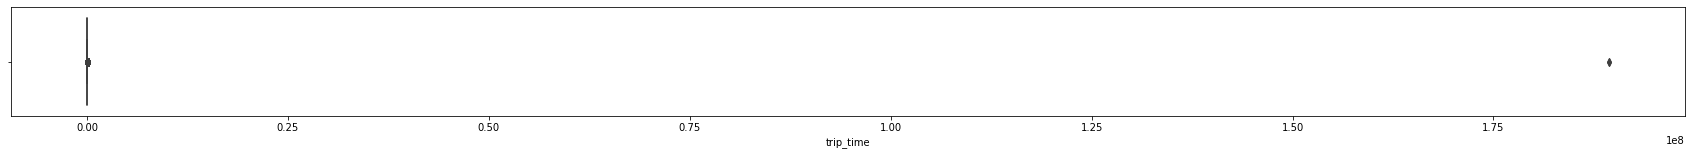

In [10]:
df['trip_time'] = df['trip_time'].dt.total_seconds().astype(int)
plt.figure(figsize=[30,2])
sns.boxplot(df['trip_time'])

In [11]:
df['trip_time'].sort_values(ascending=False)

18472645    189323850
18471905    189321949
16833729       131879
16831879       131362
16831175       128758
              ...    
11651338        -3342
11651278        -3366
11651343        -3380
11651221        -3524
17984941       -29011
Name: trip_time, Length: 19233765, dtype: int64

There are obviously some outliers need to be cleared. 

In [12]:
#df.drop(df[df['trip_time'] > 100000].index, inplace = True)
#df.drop(df[df['trip_time'] < 10 ].index, inplace = True)

We can remove them or replace with mean or median of the trip_time column according to our needs.   

### Trip Distance

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


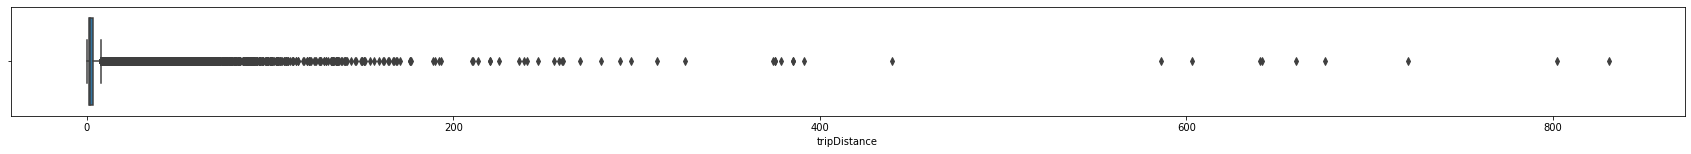

In [13]:
plt.figure(figsize=[30,2])
sns.boxplot(df['tripDistance'])

In [14]:
df['tripDistance'].loc[(df['tripDistance'] == 0)].count()

273837

In [15]:
df['tripDistance'].loc[(df['tripDistance'] > 200)].count()

37

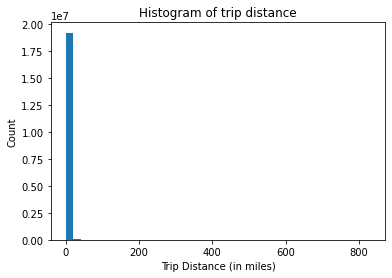

In [16]:
plt.hist(df['tripDistance'],bins = 40)
plt.title('Histogram of trip distance')
plt.xlabel('Trip Distance (in miles)')
plt.ylabel('Count')
plt.show()

The graph is right skewed to better interpretation log transform is needed

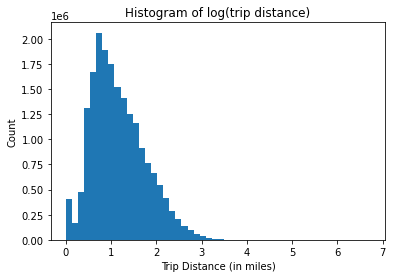

In [17]:
df['log_tripDistance'] = np.log(df['tripDistance']+1)
plt.hist(df['log_tripDistance'],bins=50)
plt.title('Histogram of log(trip distance)')
plt.xlabel('Trip Distance (in miles)')
plt.ylabel('Count')
plt.show()

In [18]:
df['tripDistance'].sort_values(ascending=False)

2628757     830.40
16871641    802.00
16919386    721.10
7590180     675.51
15351684    659.58
             ...  
18930300      0.00
13327572      0.00
13327603      0.00
3736126       0.00
16904696      0.00
Name: tripDistance, Length: 19233765, dtype: float64

Again clearly seen there are some outliers for the tripdistance like 0 and >200. We can remove them or replace them with mean or median of the tripDistance column acording to our needs.  

In [19]:
#df=df[df['tripDistance']!=0 or df['tripDistance'] < ..]
#df.drop(df[df['tripDistance'] == 0].index , inplace=True)
#df.drop(df[df['tripDistance'] > 200].index , inplace=True)

### Passenger Count

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


1    16159043
2     1447771
5      752047
3      445323
6      297845
4      124647
0        6100
8         487
7         360
9         142
Name: passengerCount, dtype: int64


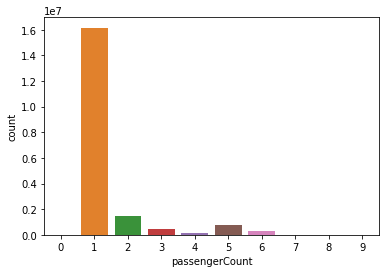

In [20]:
sns.countplot(df['passengerCount'])
print(df.passengerCount.value_counts())

Some values in passengerCount column are clearly wrong. Like 0 passenger and >6 passengers. These rows should be removed or replaced with mean-median values of the column. 

In [23]:
#df=df[df['passengerCount']!=0]
#df=df[df['passengerCount']<=6]

### Pickup Time

Creating a hour column which indicates the pickup time of taxis.

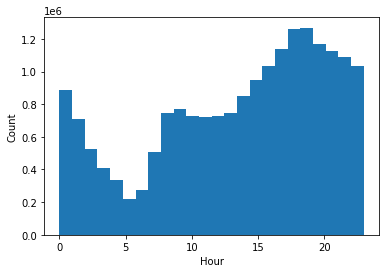

In [21]:
df['hour'] = pd.DatetimeIndex(df['lpepPickupDatetime']).hour
plt.hist(df['hour'],bins = 24)
plt.xlabel('Hour')
plt.ylabel('Count')
plt.show()

There is no anomaly in hour graph. People are riding in a taxi mostly between 17:00 and 19:00, rarely between 04:00 and 06:00

### Fare Amount

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


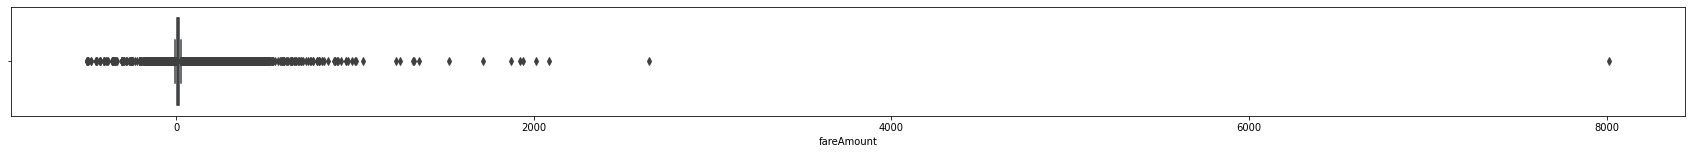

In [22]:
plt.figure(figsize=[30,2])
sns.boxplot(df['fareAmount'])

In [23]:
df['fareAmount'].sort_values(ascending=False)

13478764    8010.5
13591319    2645.5
15075030    2084.0
15966243    2013.5
18504753    1937.5
             ...  
10291768    -499.0
18994204    -499.0
9939142     -499.0
11470257    -499.0
10879001    -499.0
Name: fareAmount, Length: 19233765, dtype: float64

In [24]:
print(df['fareAmount'].loc[(df['fareAmount'] < 0)].count())

30852


In [28]:
#df=df[df['fareAmount']!=0]
#df=df[df['fareAmount']<= ...]

There some wrong values in fareAmount column. These values can not be negative or such a big number like 2000. These rows should be removed or replaced with mean-median values of the column. 

### Tip Amount

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


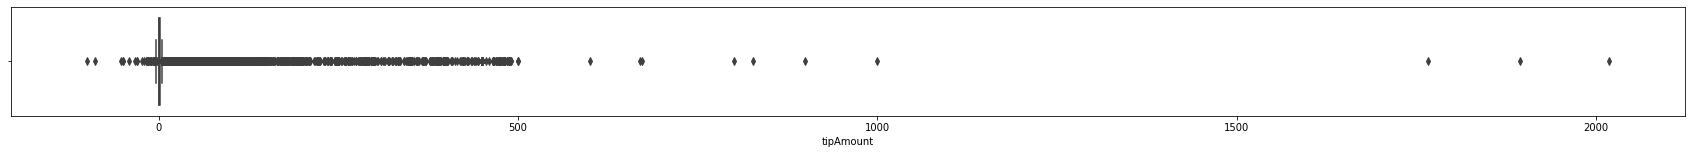

In [25]:
plt.figure(figsize=[30,2])
sns.boxplot(df['tipAmount'])


In [26]:
df['tipAmount'].sort_values(ascending=False)

18504753    2017.73
16012293    1894.65
14697951    1766.05
11030833     999.99
4213768      900.00
             ...   
5460791      -50.00
8465936      -50.00
17945463     -52.00
12306180     -88.80
1380507     -100.00
Name: tipAmount, Length: 19233765, dtype: float64

In [31]:
#df=df[df['tipAmount']!=0]
#df=df[df['tipAmount']<= ...]

There some illogical values in tipAmount column. These values can not be negative or such a big number like 2000. These rows should be removed or replaced with mean-median values of the column. 

### Longitude - Latitude


In [27]:
print(df['pickupLongitude'].loc[(df['pickupLongitude'] == 0)].count())
print(df['pickupLatitude'].loc[(df['pickupLatitude'] == 0)].count())
print(df['dropoffLongitude'].loc[(df['dropoffLongitude'] == 0)].count())
print(df['dropoffLatitude'].loc[(df['dropoffLatitude'] == 0)].count())

27703
27703
26437
26437


Since longitude and latitude can not be 0, which need to be taking care of by removing them or replacing by reasonable values. 

### Month

Creating a new column for the months. 

In [28]:
df['month'] = pd.DatetimeIndex(df['lpepPickupDatetime']).month
df.head()

,vendorID,lpepPickupDatetime,lpepDropoffDatetime,passengerCount,tripDistance,pickupLongitude,pickupLatitude,dropoffLongitude,dropoffLatitude,rateCodeID,storeAndFwdFlag,paymentType,fareAmount,extra,mtaTax,improvementSurcharge,tipAmount,tollsAmount,totalAmount,trip_time,log_tripDistance,hour,month
0,2,2015-08-06 20:35:30,2015-08-06 20:46:38,6,1.69,-73.987366,40.691803,-73.965096,40.693909,1,N,1,9.0,0.5,0.5,0.3,2.06,0.0,12.36,668,0.989541,20,8
1,2,2015-08-06 20:37:48,2015-08-06 20:46:15,1,1.52,-73.919434,40.835239,-73.932487,40.850399,1,N,2,8.0,0.5,0.5,0.3,0.00,0.0,9.30,507,0.924259,20,8
2,2,2015-08-06 20:39:17,2015-08-06 20:45:41,1,0.96,-73.994659,40.703766,-73.995895,40.691719,1,N,2,6.0,0.5,0.5,0.3,0.00,0.0,7.30,384,0.672944,20,8
3,2,2015-08-06 20:29:37,2015-08-06 20:46:35,1,2.87,-73.994659,40.703018,-73.968422,40.707420,1,N,1,13.0,0.5,0.5,0.3,3.58,0.0,17.88,1018,1.353255,20,8
4,2,2015-08-06 20:36:28,2015-08-06 20:44:31,1,1.33,-73.921120,40.752457,-73.942848,40.753674,1,N,2,7.5,0.5,0.5,0.3,0.00,0.0,8.80,483,0.845868,20,8


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


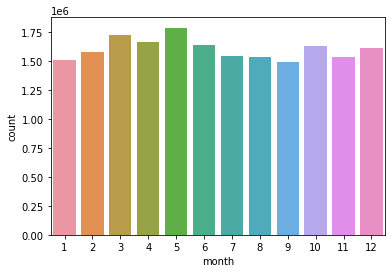

In [29]:
sns.countplot(df['month'])

There is no anomaly in month graph.

## 2020


In [2]:
from google.colab import drive
drive.mount("/content/drive", force_remount=True)
arr = []
for filename in glob.iglob('/content/drive/MyDrive/green2/puYear=2020/**/*.parquet',recursive = True):
  arr.append(pd.read_parquet(filename))
df = pd.concat(arr, ignore_index=True)
df.head()

Mounted at /content/drive


,vendorID,lpepPickupDatetime,lpepDropoffDatetime,passengerCount,tripDistance,puLocationId,doLocationId,pickupLongitude,pickupLatitude,dropoffLongitude,dropoffLatitude,rateCodeID,storeAndFwdFlag,paymentType,fareAmount,extra,mtaTax,improvementSurcharge,tipAmount,tollsAmount,ehailFee,totalAmount,tripType
0,2,2020-11-14 09:55:36,2020-11-14 10:04:54,1,3.80,82,138,NaN,NaN,NaN,NaN,1,N,2,12.5,1.0,0.5,0.3,0.0,0.0,NaN,14.3,1
1,2,2020-11-14 11:38:07,2020-11-14 11:42:22,1,0.63,129,129,NaN,NaN,NaN,NaN,1,N,2,4.5,1.0,0.5,0.3,0.0,0.0,NaN,6.3,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   vendorID              2 non-null      int32         
 1   lpepPickupDatetime    2 non-null      datetime64[ns]
 2   lpepDropoffDatetime   2 non-null      datetime64[ns]
 3   passengerCount        2 non-null      int32         
 4   tripDistance          2 non-null      float64       
 5   puLocationId          2 non-null      object        
 6   doLocationId          2 non-null      object        
 7   pickupLongitude       0 non-null      float64       
 8   pickupLatitude        0 non-null      float64       
 9   dropoffLongitude      0 non-null      float64       
 10  dropoffLatitude       0 non-null      float64       
 11  rateCodeID            2 non-null      int32         
 12  storeAndFwdFlag       2 non-null      object        
 13  paymentType           2 

<font color = 'red'> This data is not sufficient to make further analysis. </font>

## 2019


In [3]:
from google.colab import drive
drive.mount("/content/drive", force_remount=True)
arr = []
for filename in glob.iglob('/content/drive/MyDrive/green2/puYear=2019/**/*.parquet',recursive = True):
  arr.append(pd.read_parquet(filename))
df = pd.concat(arr, ignore_index=True)
df.head()

Mounted at /content/drive


,vendorID,lpepPickupDatetime,lpepDropoffDatetime,passengerCount,tripDistance,puLocationId,doLocationId,pickupLongitude,pickupLatitude,dropoffLongitude,dropoffLatitude,rateCodeID,storeAndFwdFlag,paymentType,fareAmount,extra,mtaTax,improvementSurcharge,tipAmount,tollsAmount,ehailFee,totalAmount,tripType
0,2,2019-01-22 06:16:11,2019-01-22 06:23:35,1,0.82,82,82,NaN,NaN,NaN,NaN,1,N,2,6.5,0.0,0.5,0.3,0.00,0.0,NaN,7.30,1
1,2,2019-01-06 06:51:26,2019-01-06 06:54:47,1,0.70,255,256,NaN,NaN,NaN,NaN,1,N,2,4.5,0.5,0.5,0.3,0.00,0.0,NaN,5.80,1
2,2,2019-01-06 07:02:28,2019-01-06 07:19:04,1,5.48,255,233,NaN,NaN,NaN,NaN,1,N,1,18.0,0.5,0.5,0.3,3.86,0.0,NaN,23.16,1
3,2,2019-01-27 14:47:08,2019-01-27 15:06:08,1,5.16,188,123,NaN,NaN,NaN,NaN,1,N,2,17.5,0.5,0.5,0.3,0.00,0.0,NaN,18.80,1
4,2,2019-01-07 08:06:13,2019-01-07 08:08:25,1,0.39,256,217,NaN,NaN,NaN,NaN,1,N,2,3.5,0.5,0.5,0.3,0.00,0.0,NaN,4.80,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3297967 entries, 0 to 3297966
Data columns (total 23 columns):
 #   Column                Dtype         
---  ------                -----         
 0   vendorID              int32         
 1   lpepPickupDatetime    datetime64[ns]
 2   lpepDropoffDatetime   datetime64[ns]
 3   passengerCount        int32         
 4   tripDistance          float64       
 5   puLocationId          object        
 6   doLocationId          object        
 7   pickupLongitude       float64       
 8   pickupLatitude        float64       
 9   dropoffLongitude      float64       
 10  dropoffLatitude       float64       
 11  rateCodeID            int32         
 12  storeAndFwdFlag       object        
 13  paymentType           int32         
 14  fareAmount            float64       
 15  extra                 float64       
 16  mtaTax                float64       
 17  improvementSurcharge  object        
 18  tipAmount             float64       
 19  

### NaN Values

In [4]:
df.isnull().sum()

vendorID                      0
lpepPickupDatetime            0
lpepDropoffDatetime           0
passengerCount                0
tripDistance                  0
puLocationId                  0
doLocationId                  0
pickupLongitude         3297967
pickupLatitude          3297967
dropoffLongitude        3297967
dropoffLatitude         3297967
rateCodeID                    0
storeAndFwdFlag               0
paymentType                   0
fareAmount                    0
extra                         0
mtaTax                        0
improvementSurcharge          0
tipAmount                     0
tollsAmount                   0
ehailFee                3297967
totalAmount                   0
tripType                      0
dtype: int64

In [5]:
df.isnull().mean().round(2)*100

vendorID                  0.0
lpepPickupDatetime        0.0
lpepDropoffDatetime       0.0
passengerCount            0.0
tripDistance              0.0
puLocationId              0.0
doLocationId              0.0
pickupLongitude         100.0
pickupLatitude          100.0
dropoffLongitude        100.0
dropoffLatitude         100.0
rateCodeID                0.0
storeAndFwdFlag           0.0
paymentType               0.0
fareAmount                0.0
extra                     0.0
mtaTax                    0.0
improvementSurcharge      0.0
tipAmount                 0.0
tollsAmount               0.0
ehailFee                100.0
totalAmount               0.0
tripType                  0.0
dtype: float64

In [6]:
df = df.loc[:,df.isnull().mean() == 0]
df.head()

,vendorID,lpepPickupDatetime,lpepDropoffDatetime,passengerCount,tripDistance,puLocationId,doLocationId,rateCodeID,storeAndFwdFlag,paymentType,fareAmount,extra,mtaTax,improvementSurcharge,tipAmount,tollsAmount,totalAmount,tripType
0,2,2019-01-22 06:16:11,2019-01-22 06:23:35,1,0.82,82,82,1,N,2,6.5,0.0,0.5,0.3,0.00,0.0,7.30,1
1,2,2019-01-06 06:51:26,2019-01-06 06:54:47,1,0.70,255,256,1,N,2,4.5,0.5,0.5,0.3,0.00,0.0,5.80,1
2,2,2019-01-06 07:02:28,2019-01-06 07:19:04,1,5.48,255,233,1,N,1,18.0,0.5,0.5,0.3,3.86,0.0,23.16,1
3,2,2019-01-27 14:47:08,2019-01-27 15:06:08,1,5.16,188,123,1,N,2,17.5,0.5,0.5,0.3,0.00,0.0,18.80,1
4,2,2019-01-07 08:06:13,2019-01-07 08:08:25,1,0.39,256,217,1,N,2,3.5,0.5,0.5,0.3,0.00,0.0,4.80,1


### Pre-Analysis

In [4]:
df.duplicated().sum()

57

In [5]:
df = df.drop_duplicates()

In [6]:
df.nunique()

vendorID                      2
lpepPickupDatetime      2877580
lpepDropoffDatetime     2872261
passengerCount               10
tripDistance               4006
puLocationId                262
doLocationId                261
pickupLongitude               0
pickupLatitude                0
dropoffLongitude              0
dropoffLatitude               0
rateCodeID                    7
storeAndFwdFlag               2
paymentType                   5
fareAmount                 7110
extra                        20
mtaTax                       10
improvementSurcharge          3
tipAmount                  2407
tollsAmount                 362
ehailFee                      0
totalAmount               10553
tripType                      2
dtype: int64

In [8]:
df.describe()

,vendorID,passengerCount,tripDistance,rateCodeID,paymentType,fareAmount,extra,mtaTax,tipAmount,tollsAmount,totalAmount,tripType
count,3.297967e+06,3.297967e+06,3.297967e+06,3.297967e+06,3.297967e+06,3.297967e+06,3.297967e+06,3.297967e+06,3.297967e+06,3.297967e+06,3.297967e+06,3.297967e+06
mean,1.845081e+00,1.310435e+00,3.248497e+00,1.246336e+00,1.422544e+00,1.367314e+01,3.593919e-01,4.864366e-01,9.819160e-01,2.190119e-01,1.627943e+01,1.059259e+00
std,3.618279e-01,9.733154e-01,3.944217e+00,9.856552e-01,5.174255e-01,1.282230e+01,5.420558e-01,9.148588e-02,1.951148e+00,1.195348e+00,1.392840e+01,2.361087e-01
min,1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,-8.900000e+02,-4.500000e+00,-5.000000e-01,-2.122000e+01,-2.100000e+01,-8.903000e+02,1.000000e+00
25%,2.000000e+00,1.000000e+00,1.050000e+00,1.000000e+00,1.000000e+00,6.500000e+00,0.000000e+00,5.000000e-01,0.000000e+00,0.000000e+00,8.300000e+00,1.000000e+00
50%,2.000000e+00,1.000000e+00,1.900000e+00,1.000000e+00,1.000000e+00,1.000000e+01,0.000000e+00,5.000000e-01,0.000000e+00,0.000000e+00,1.230000e+01,1.000000e+00
75%,2.000000e+00,1.000000e+00,3.800000e+00,1.000000e+00,2.000000e+00,1.643000e+01,5.000000e-01,5.000000e-01,1.660000e+00,0.000000e+00,1.930000e+01,1.000000e+00
max,2.000000e+00,9.000000e+00,6.666000e+02,9.900000e+01,5.000000e+00,4.011500e+03,1.158000e+01,3.800000e+00,4.400000e+02,1.600000e+02,4.012300e+03,2.000000e+00


### Trip Duration 

In [9]:
df['trip_time'] = df['lpepDropoffDatetime']-df['lpepPickupDatetime']
#df['trip_time'] = df['trip_time'].dt.total_seconds().astype(int)
df.head()

,vendorID,lpepPickupDatetime,lpepDropoffDatetime,passengerCount,tripDistance,puLocationId,doLocationId,rateCodeID,storeAndFwdFlag,paymentType,fareAmount,extra,mtaTax,improvementSurcharge,tipAmount,tollsAmount,totalAmount,tripType,trip_time
0,2,2019-01-22 06:16:11,2019-01-22 06:23:35,1,0.82,82,82,1,N,2,6.5,0.0,0.5,0.3,0.00,0.0,7.30,1,0 days 00:07:24
1,2,2019-01-06 06:51:26,2019-01-06 06:54:47,1,0.70,255,256,1,N,2,4.5,0.5,0.5,0.3,0.00,0.0,5.80,1,0 days 00:03:21
2,2,2019-01-06 07:02:28,2019-01-06 07:19:04,1,5.48,255,233,1,N,1,18.0,0.5,0.5,0.3,3.86,0.0,23.16,1,0 days 00:16:36
3,2,2019-01-27 14:47:08,2019-01-27 15:06:08,1,5.16,188,123,1,N,2,17.5,0.5,0.5,0.3,0.00,0.0,18.80,1,0 days 00:19:00
4,2,2019-01-07 08:06:13,2019-01-07 08:08:25,1,0.39,256,217,1,N,2,3.5,0.5,0.5,0.3,0.00,0.0,4.80,1,0 days 00:02:12


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


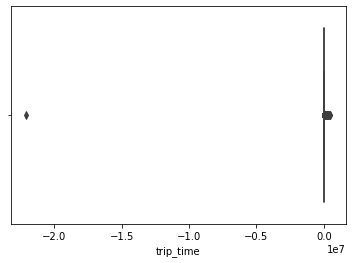

In [10]:
df['trip_time'] = df['trip_time'].dt.total_seconds().astype(int)
#plt.figure(figsize=[30,2])
sns.boxplot(df['trip_time'])

In [11]:
df['trip_time'].sort_values(ascending=False)

2348569      482088
2607694      431165
3150726      350207
1864642      347054
3132896      336913
             ...   
2564404           0
2564403           0
2564402           0
2132286           0
3270379   -22117653
Name: trip_time, Length: 3297967, dtype: int64

### Trip Distance

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


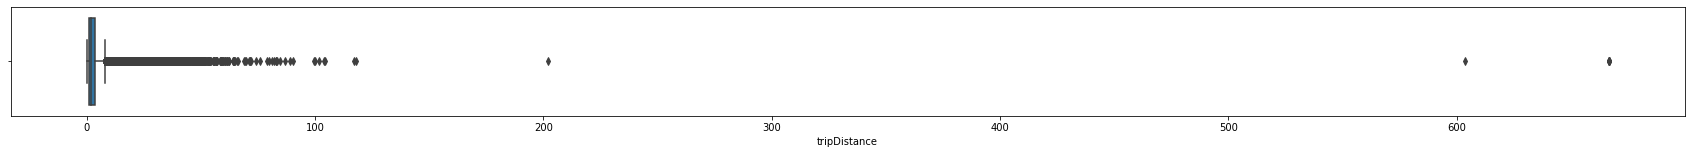

In [12]:
plt.figure(figsize=[30,2])
sns.boxplot(df['tripDistance'])

In [13]:
df['tripDistance'].loc[(df['tripDistance'] == 0)].count()

57734

In [14]:
df['tripDistance'].loc[(df['tripDistance'] > 200)].count()

9

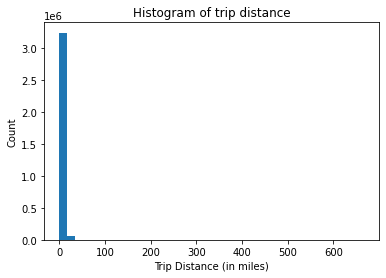

In [15]:
plt.hist(df['tripDistance'],bins = 40)
plt.title('Histogram of trip distance')
plt.xlabel('Trip Distance (in miles)')
plt.ylabel('Count')
plt.show()

In [16]:
df['tripDistance'].sort_values(ascending=False)

2366012    666.6
2364823    666.6
2364824    666.6
2364825    666.6
2366014    666.6
           ...  
1736514      0.0
2940631      0.0
2263885      0.0
2940569      0.0
2669108      0.0
Name: tripDistance, Length: 3297967, dtype: float64

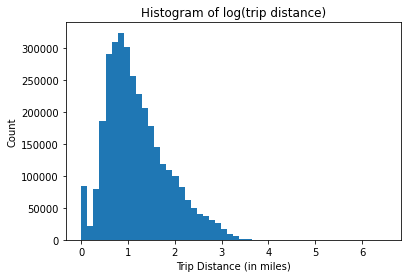

In [17]:
df['log_tripDistance'] = np.log(df['tripDistance']+1)
plt.hist(df['log_tripDistance'],bins=50)
plt.title('Histogram of log(trip distance)')
plt.xlabel('Trip Distance (in miles)')
plt.ylabel('Count')
plt.show()

### Passenger Count

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


1    2840456
2     240310
5      98045
6      51665
3      43671
4      17110
0       6579
8         62
7         44
9         25
Name: passengerCount, dtype: int64


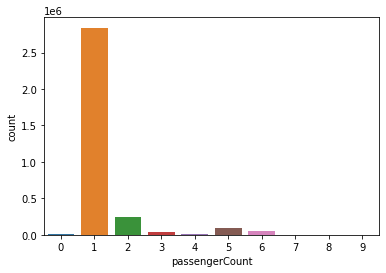

In [18]:
sns.countplot(df['passengerCount'])
print(df.passengerCount.value_counts())

### Pickup Time

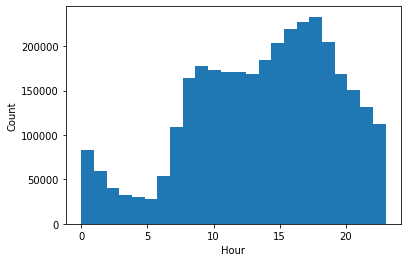

In [19]:
df['hour'] = pd.DatetimeIndex(df['lpepPickupDatetime']).hour
plt.hist(df['hour'],bins = 24)
plt.xlabel('Hour')
plt.ylabel('Count')
plt.show()

### Fare Amount

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


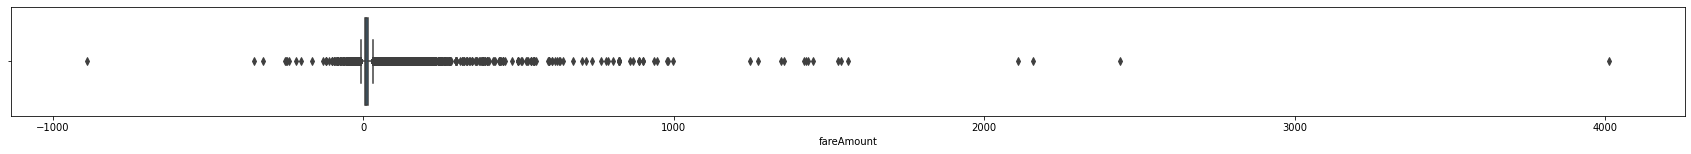

In [20]:
plt.figure(figsize=[30,2])
sns.boxplot(df['fareAmount'])

In [21]:
df['fareAmount'].sort_values(ascending=False)

2781972    4011.5
1526860    2438.5
2456788    2156.0
1016279    2109.0
934756     1562.5
            ...  
2760162    -249.0
740489     -250.0
956375     -324.0
2148218    -350.0
1995664    -890.0
Name: fareAmount, Length: 3297967, dtype: float64

In [22]:
print(df['fareAmount'].loc[(df['fareAmount'] < 0)].count())

11664


### Tip Amount

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


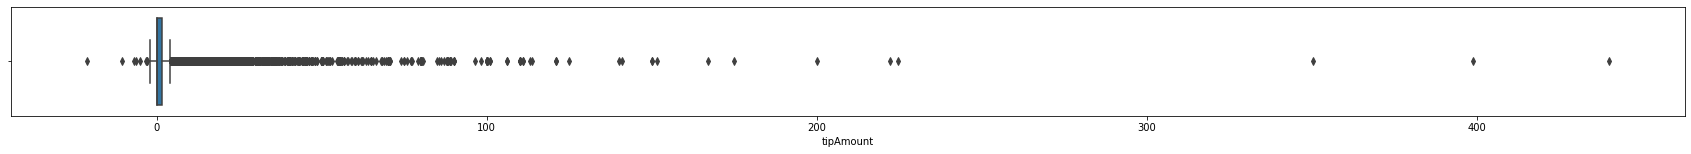

In [23]:
plt.figure(figsize=[30,2])
sns.boxplot(df['tipAmount'])

In [24]:
df['tipAmount'].sort_values(ascending=False)

2781674    440.00
1172809    399.00
2256096    350.30
3270634    224.57
1782537    222.22
            ...  
3162309     -5.00
2580420     -6.34
626067      -7.00
3938       -10.56
2994039    -21.22
Name: tipAmount, Length: 3297967, dtype: float64

### Month

In [26]:
df['month'] = pd.DatetimeIndex(df['lpepPickupDatetime']).month
df.head()

,vendorID,lpepPickupDatetime,lpepDropoffDatetime,passengerCount,tripDistance,puLocationId,doLocationId,rateCodeID,storeAndFwdFlag,paymentType,fareAmount,extra,mtaTax,improvementSurcharge,tipAmount,tollsAmount,totalAmount,tripType,trip_time,log_tripDistance,hour,month
0,2,2019-01-22 06:16:11,2019-01-22 06:23:35,1,0.82,82,82,1,N,2,6.5,0.0,0.5,0.3,0.00,0.0,7.30,1,444,0.598837,6,1
1,2,2019-01-06 06:51:26,2019-01-06 06:54:47,1,0.70,255,256,1,N,2,4.5,0.5,0.5,0.3,0.00,0.0,5.80,1,201,0.530628,6,1
2,2,2019-01-06 07:02:28,2019-01-06 07:19:04,1,5.48,255,233,1,N,1,18.0,0.5,0.5,0.3,3.86,0.0,23.16,1,996,1.868721,7,1
3,2,2019-01-27 14:47:08,2019-01-27 15:06:08,1,5.16,188,123,1,N,2,17.5,0.5,0.5,0.3,0.00,0.0,18.80,1,1140,1.818077,14,1
4,2,2019-01-07 08:06:13,2019-01-07 08:08:25,1,0.39,256,217,1,N,2,3.5,0.5,0.5,0.3,0.00,0.0,4.80,1,132,0.329304,8,1


In [30]:
df.month.value_counts()

1    630889
3    601071
2    575678
4    514392
5    504898
6    471023
7        15
8         1
Name: month, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


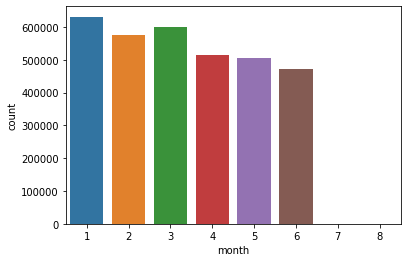

In [28]:
sns.countplot(df['month'])

---------------------


## 2018

In [2]:
from google.colab import drive
drive.mount("/content/drive", force_remount=True)
arr = []
for filename in glob.iglob('/content/drive/MyDrive/green2/puYear=2018/**/*.parquet',recursive = True):
  arr.append(pd.read_parquet(filename))
df = pd.concat(arr, ignore_index=True)
df.head()

Mounted at /content/drive


,vendorID,lpepPickupDatetime,lpepDropoffDatetime,passengerCount,tripDistance,puLocationId,doLocationId,pickupLongitude,pickupLatitude,dropoffLongitude,dropoffLatitude,rateCodeID,storeAndFwdFlag,paymentType,fareAmount,extra,mtaTax,improvementSurcharge,tipAmount,tollsAmount,ehailFee,totalAmount,tripType
0,2,2018-08-09 12:35:32,2018-08-09 12:39:43,1,0.65,76,76,NaN,NaN,NaN,NaN,1,N,1,5.0,0.0,0.5,0.3,0.0,0.0,NaN,5.8,1.0
1,2,2018-08-09 13:02:05,2018-08-09 13:17:19,1,3.59,35,76,NaN,NaN,NaN,NaN,1,N,1,14.0,0.0,0.5,0.3,0.0,0.0,NaN,14.8,1.0
2,2,2018-08-09 12:33:17,2018-08-09 12:40:56,1,1.11,181,25,NaN,NaN,NaN,NaN,1,N,2,7.0,0.0,0.5,0.3,0.0,0.0,NaN,7.8,1.0
3,2,2018-08-09 13:02:10,2018-08-09 13:10:07,1,0.98,17,17,NaN,NaN,NaN,NaN,1,N,2,7.0,0.0,0.5,0.3,0.0,0.0,NaN,7.8,1.0
4,2,2018-08-09 12:06:47,2018-08-09 12:52:18,1,9.21,66,239,NaN,NaN,NaN,NaN,1,N,1,34.5,0.0,0.5,0.3,5.0,0.0,NaN,40.3,1.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8806899 entries, 0 to 8806898
Data columns (total 23 columns):
 #   Column                Dtype         
---  ------                -----         
 0   vendorID              int32         
 1   lpepPickupDatetime    datetime64[ns]
 2   lpepDropoffDatetime   datetime64[ns]
 3   passengerCount        int32         
 4   tripDistance          float64       
 5   puLocationId          object        
 6   doLocationId          object        
 7   pickupLongitude       float64       
 8   pickupLatitude        float64       
 9   dropoffLongitude      float64       
 10  dropoffLatitude       float64       
 11  rateCodeID            int32         
 12  storeAndFwdFlag       object        
 13  paymentType           int32         
 14  fareAmount            float64       
 15  extra                 float64       
 16  mtaTax                float64       
 17  improvementSurcharge  object        
 18  tipAmount             float64       
 19  

### NaN Values

In [5]:
df.isnull().sum()

vendorID                      0
lpepPickupDatetime            0
lpepDropoffDatetime           0
passengerCount                0
tripDistance                  0
puLocationId                  0
doLocationId                  0
pickupLongitude         8806899
pickupLatitude          8806899
dropoffLongitude        8806899
dropoffLatitude         8806899
rateCodeID                    0
storeAndFwdFlag               0
paymentType                   0
fareAmount                    0
extra                         0
mtaTax                        0
improvementSurcharge          0
tipAmount                     0
tollsAmount                   0
ehailFee                8806899
totalAmount                   0
tripType                     63
dtype: int64

In [6]:
df.isnull().mean().round(2)*100

vendorID                  0.0
lpepPickupDatetime        0.0
lpepDropoffDatetime       0.0
passengerCount            0.0
tripDistance              0.0
puLocationId              0.0
doLocationId              0.0
pickupLongitude         100.0
pickupLatitude          100.0
dropoffLongitude        100.0
dropoffLatitude         100.0
rateCodeID                0.0
storeAndFwdFlag           0.0
paymentType               0.0
fareAmount                0.0
extra                     0.0
mtaTax                    0.0
improvementSurcharge      0.0
tipAmount                 0.0
tollsAmount               0.0
ehailFee                100.0
totalAmount               0.0
tripType                  0.0
dtype: float64

In [7]:
df = df.loc[:,df.isnull().mean() == 0]
df.head()

,vendorID,lpepPickupDatetime,lpepDropoffDatetime,passengerCount,tripDistance,puLocationId,doLocationId,rateCodeID,storeAndFwdFlag,paymentType,fareAmount,extra,mtaTax,improvementSurcharge,tipAmount,tollsAmount,totalAmount
0,2,2018-08-09 12:35:32,2018-08-09 12:39:43,1,0.65,76,76,1,N,1,5.0,0.0,0.5,0.3,0.0,0.0,5.8
1,2,2018-08-09 13:02:05,2018-08-09 13:17:19,1,3.59,35,76,1,N,1,14.0,0.0,0.5,0.3,0.0,0.0,14.8
2,2,2018-08-09 12:33:17,2018-08-09 12:40:56,1,1.11,181,25,1,N,2,7.0,0.0,0.5,0.3,0.0,0.0,7.8
3,2,2018-08-09 13:02:10,2018-08-09 13:10:07,1,0.98,17,17,1,N,2,7.0,0.0,0.5,0.3,0.0,0.0,7.8
4,2,2018-08-09 12:06:47,2018-08-09 12:52:18,1,9.21,66,239,1,N,1,34.5,0.0,0.5,0.3,5.0,0.0,40.3


### Pre-Analysis

In [3]:
df.duplicated().sum()

65

In [ ]:
df = df.drop_duplicates()

In [8]:
df.nunique()

vendorID                      2
lpepPickupDatetime      7410043
lpepDropoffDatetime     7401625
passengerCount               10
tripDistance               4488
puLocationId                260
doLocationId                262
rateCodeID                    7
storeAndFwdFlag               2
paymentType                   5
fareAmount                 6777
extra                        14
mtaTax                        7
improvementSurcharge          4
tipAmount                  2896
tollsAmount                 446
totalAmount               11364
dtype: int64

In [9]:
df.describe()

,vendorID,passengerCount,tripDistance,rateCodeID,paymentType,fareAmount,extra,mtaTax,tipAmount,tollsAmount,totalAmount
count,8.806899e+06,8.806899e+06,8.806899e+06,8.806899e+06,8.806899e+06,8.806899e+06,8.806899e+06,8.806899e+06,8.806899e+06,8.806899e+06,8.806899e+06
mean,1.838592e+00,1.350604e+00,3.184309e+00,1.114503e+00,1.440588e+00,1.342783e+01,3.268806e-01,4.890031e-01,1.016817e+00,1.744204e-01,1.575085e+01
std,3.679071e-01,1.030419e+00,4.528589e+00,7.109805e-01,5.188698e-01,1.266474e+01,3.958480e-01,8.655206e-02,2.005320e+00,1.191873e+00,1.368756e+01
min,1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,-5.000000e+02,-2.542000e+01,-5.000000e-01,-1.000000e+02,-1.500000e+01,-5.000000e+02
25%,2.000000e+00,1.000000e+00,1.060000e+00,1.000000e+00,1.000000e+00,6.500000e+00,0.000000e+00,5.000000e-01,0.000000e+00,0.000000e+00,8.300000e+00
50%,2.000000e+00,1.000000e+00,1.900000e+00,1.000000e+00,1.000000e+00,1.000000e+01,0.000000e+00,5.000000e-01,0.000000e+00,0.000000e+00,1.180000e+01
75%,2.000000e+00,1.000000e+00,3.800000e+00,1.000000e+00,2.000000e+00,1.600000e+01,5.000000e-01,5.000000e-01,1.700000e+00,0.000000e+00,1.880000e+01
max,2.000000e+00,9.000000e+00,8.005680e+03,9.900000e+01,5.000000e+00,1.044584e+04,4.500000e+00,8.291000e+01,4.855500e+02,7.655400e+02,1.052875e+04


### Trip Duration 

In [10]:
df['trip_time'] = df['lpepDropoffDatetime']-df['lpepPickupDatetime']
#df['trip_time'] = df['trip_time'].dt.total_seconds().astype(int)
df.head()

,vendorID,lpepPickupDatetime,lpepDropoffDatetime,passengerCount,tripDistance,puLocationId,doLocationId,rateCodeID,storeAndFwdFlag,paymentType,fareAmount,extra,mtaTax,improvementSurcharge,tipAmount,tollsAmount,totalAmount,trip_time
0,2,2018-08-09 12:35:32,2018-08-09 12:39:43,1,0.65,76,76,1,N,1,5.0,0.0,0.5,0.3,0.0,0.0,5.8,0 days 00:04:11
1,2,2018-08-09 13:02:05,2018-08-09 13:17:19,1,3.59,35,76,1,N,1,14.0,0.0,0.5,0.3,0.0,0.0,14.8,0 days 00:15:14
2,2,2018-08-09 12:33:17,2018-08-09 12:40:56,1,1.11,181,25,1,N,2,7.0,0.0,0.5,0.3,0.0,0.0,7.8,0 days 00:07:39
3,2,2018-08-09 13:02:10,2018-08-09 13:10:07,1,0.98,17,17,1,N,2,7.0,0.0,0.5,0.3,0.0,0.0,7.8,0 days 00:07:57
4,2,2018-08-09 12:06:47,2018-08-09 12:52:18,1,9.21,66,239,1,N,1,34.5,0.0,0.5,0.3,5.0,0.0,40.3,0 days 00:45:31


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


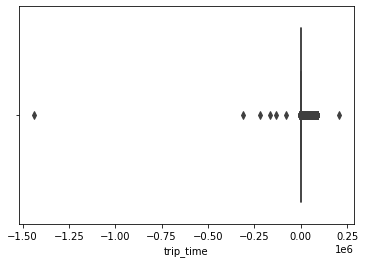

In [11]:
df['trip_time'] = df['trip_time'].dt.total_seconds().astype(int)
#plt.figure(figsize=[30,2])
sns.boxplot(df['trip_time'])

In [12]:
df['trip_time'].sort_values(ascending=False)

3165985     202989
1823555      86399
2702813      86398
5989576      86398
6699155      86397
            ...   
8609298    -135996
5827832    -164747
6100553    -219473
7803089    -313307
7039638   -1437165
Name: trip_time, Length: 8806899, dtype: int64

### Trip Distance

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


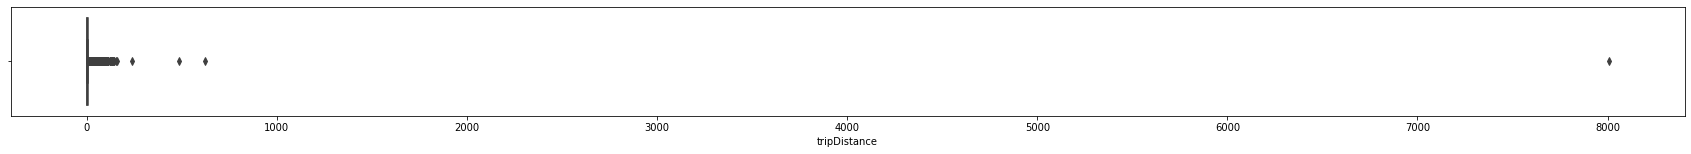

In [13]:
plt.figure(figsize=[30,2])
sns.boxplot(df['tripDistance'])

In [17]:
df['tripDistance'].loc[(df['tripDistance'] <= 0)].count()

102289

In [15]:
df['tripDistance'].loc[(df['tripDistance'] > 200)].count()

4

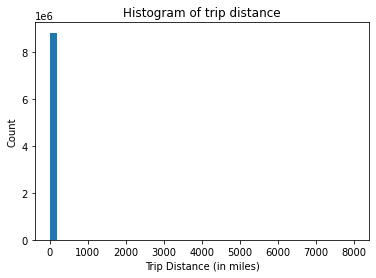

In [18]:
plt.hist(df['tripDistance'],bins = 40)
plt.title('Histogram of trip distance')
plt.xlabel('Trip Distance (in miles)')
plt.ylabel('Count')
plt.show()

In [19]:
df['tripDistance'].sort_values(ascending=False)

4480417    8005.68
6078554     621.10
7767377     482.80
7708005     235.70
2508870     159.01
            ...   
7002586       0.00
3556281       0.00
1888086       0.00
3556206       0.00
8806898       0.00
Name: tripDistance, Length: 8806899, dtype: float64

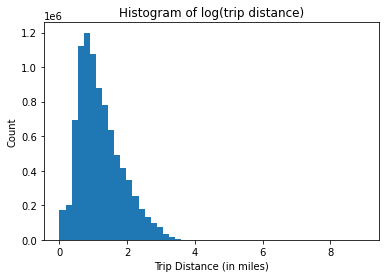

In [20]:
df['log_tripDistance'] = np.log(df['tripDistance']+1)
plt.hist(df['log_tripDistance'],bins=50)
plt.title('Histogram of log(trip distance)')
plt.xlabel('Trip Distance (in miles)')
plt.ylabel('Count')
plt.show()

### Passenger Count

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


1    7463689
2     681632
5     298750
6     156579
3     142167
4      51406
0      12371
7        141
8        131
9         33
Name: passengerCount, dtype: int64


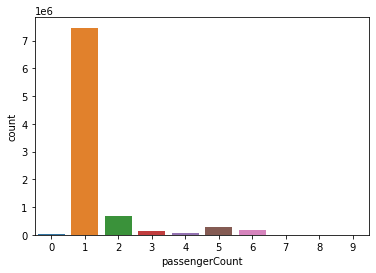

In [21]:
sns.countplot(df['passengerCount'])
print(df.passengerCount.value_counts())

### Pickup Time

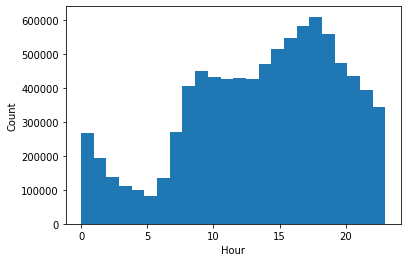

In [22]:
df['hour'] = pd.DatetimeIndex(df['lpepPickupDatetime']).hour
plt.hist(df['hour'],bins = 24)
plt.xlabel('Hour')
plt.ylabel('Count')
plt.show()

### Fare Amount

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


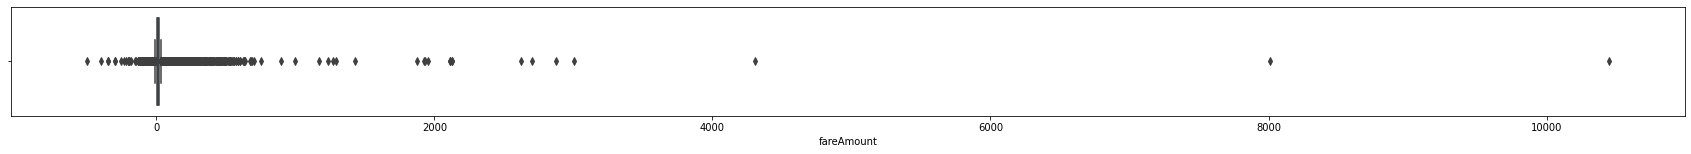

In [23]:
plt.figure(figsize=[30,2])
sns.boxplot(df['fareAmount'])

In [24]:
df['fareAmount'].sort_values(ascending=False)

7767377    10445.84
4496374     8011.50
4272479     4307.00
7588647     3005.00
613634      2872.00
             ...   
8636921     -300.00
5366004     -350.00
7143066     -350.00
5366002     -400.00
6938705     -500.00
Name: fareAmount, Length: 8806899, dtype: float64

In [25]:
print(df['fareAmount'].loc[(df['fareAmount'] < 0)].count())

23059


### Tip Amount

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


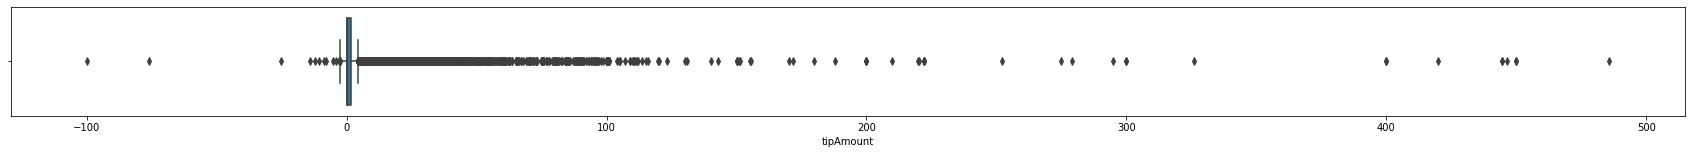

In [26]:
plt.figure(figsize=[30,2])
sns.boxplot(df['tipAmount'])

In [27]:
df['tipAmount'].sort_values(ascending=False)

3845554    485.55
4262541    450.00
5771550    450.00
142011     446.41
4262542    444.44
            ...  
3633322    -12.05
5081044    -14.19
3903087    -25.16
8804143    -76.00
7564231   -100.00
Name: tipAmount, Length: 8806899, dtype: float64

### Month

In [29]:
df['month'] = pd.DatetimeIndex(df['lpepPickupDatetime']).month
df.head()

,vendorID,lpepPickupDatetime,lpepDropoffDatetime,passengerCount,tripDistance,puLocationId,doLocationId,rateCodeID,storeAndFwdFlag,paymentType,fareAmount,extra,mtaTax,improvementSurcharge,tipAmount,tollsAmount,totalAmount,trip_time,log_tripDistance,hour,month
0,2,2018-08-09 12:35:32,2018-08-09 12:39:43,1,0.65,76,76,1,N,1,5.0,0.0,0.5,0.3,0.0,0.0,5.8,251,0.500775,12,8
1,2,2018-08-09 13:02:05,2018-08-09 13:17:19,1,3.59,35,76,1,N,1,14.0,0.0,0.5,0.3,0.0,0.0,14.8,914,1.523880,13,8
2,2,2018-08-09 12:33:17,2018-08-09 12:40:56,1,1.11,181,25,1,N,2,7.0,0.0,0.5,0.3,0.0,0.0,7.8,459,0.746688,12,8
3,2,2018-08-09 13:02:10,2018-08-09 13:10:07,1,0.98,17,17,1,N,2,7.0,0.0,0.5,0.3,0.0,0.0,7.8,477,0.683097,13,8
4,2,2018-08-09 12:06:47,2018-08-09 12:52:18,1,9.21,66,239,1,N,1,34.5,0.0,0.5,0.3,5.0,0.0,40.3,2731,2.323368,12,8


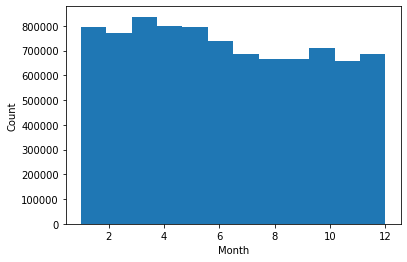

In [30]:
plt.hist(df['month'],bins = 12)
plt.xlabel('Month')
plt.ylabel('Count')
plt.show()

-----------------


## 2017

In [2]:
from google.colab import drive
drive.mount("/content/drive", force_remount=True)
arr = []
for filename in glob.iglob('/content/drive/MyDrive/green2/puYear=2017/**/*.parquet',recursive = True):
  arr.append(pd.read_parquet(filename))
df = pd.concat(arr, ignore_index=True)
df.head()

Mounted at /content/drive


,vendorID,lpepPickupDatetime,lpepDropoffDatetime,passengerCount,tripDistance,puLocationId,doLocationId,pickupLongitude,pickupLatitude,dropoffLongitude,dropoffLatitude,rateCodeID,storeAndFwdFlag,paymentType,fareAmount,extra,mtaTax,improvementSurcharge,tipAmount,tollsAmount,ehailFee,totalAmount,tripType
0,2,2017-01-02 10:41:24,2017-01-02 10:44:14,2,0.84,61,61,NaN,NaN,NaN,NaN,1,N,2,4.5,0.0,0.5,0.3,0.0,0.0,NaN,5.3,1.0
1,2,2017-01-02 10:34:53,2017-01-02 10:44:44,1,1.80,74,166,NaN,NaN,NaN,NaN,1,N,2,8.5,0.0,0.5,0.3,0.0,0.0,NaN,9.3,1.0
2,2,2017-01-02 10:36:35,2017-01-02 10:44:26,1,1.70,181,188,NaN,NaN,NaN,NaN,1,N,2,8.0,0.0,0.5,0.3,0.0,0.0,NaN,8.8,1.0
3,2,2017-01-02 10:29:01,2017-01-02 10:44:44,1,3.95,7,161,NaN,NaN,NaN,NaN,1,N,2,14.5,0.0,0.5,0.3,0.0,0.0,NaN,15.3,1.0
4,2,2017-01-02 10:39:52,2017-01-02 10:44:55,1,1.00,42,41,NaN,NaN,NaN,NaN,1,N,2,6.0,0.0,0.5,0.3,0.0,0.0,NaN,6.8,1.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11740514 entries, 0 to 11740513
Data columns (total 23 columns):
 #   Column                Dtype         
---  ------                -----         
 0   vendorID              int32         
 1   lpepPickupDatetime    datetime64[ns]
 2   lpepDropoffDatetime   datetime64[ns]
 3   passengerCount        int32         
 4   tripDistance          float64       
 5   puLocationId          object        
 6   doLocationId          object        
 7   pickupLongitude       float64       
 8   pickupLatitude        float64       
 9   dropoffLongitude      float64       
 10  dropoffLatitude       float64       
 11  rateCodeID            int32         
 12  storeAndFwdFlag       object        
 13  paymentType           int32         
 14  fareAmount            float64       
 15  extra                 float64       
 16  mtaTax                float64       
 17  improvementSurcharge  object        
 18  tipAmount             float64       
 19

### NaN Values

In [4]:
df.isnull().sum()

vendorID                       0
lpepPickupDatetime             0
lpepDropoffDatetime            0
passengerCount                 0
tripDistance                   0
puLocationId                   0
doLocationId                   0
pickupLongitude         11740514
pickupLatitude          11740514
dropoffLongitude        11740514
dropoffLatitude         11740514
rateCodeID                     0
storeAndFwdFlag                0
paymentType                    0
fareAmount                     0
extra                          0
mtaTax                         0
improvementSurcharge           0
tipAmount                      0
tollsAmount                    0
ehailFee                11740514
totalAmount                    0
tripType                      27
dtype: int64

In [5]:
df.isnull().mean().round(2)*100

vendorID                  0.0
lpepPickupDatetime        0.0
lpepDropoffDatetime       0.0
passengerCount            0.0
tripDistance              0.0
puLocationId              0.0
doLocationId              0.0
pickupLongitude         100.0
pickupLatitude          100.0
dropoffLongitude        100.0
dropoffLatitude         100.0
rateCodeID                0.0
storeAndFwdFlag           0.0
paymentType               0.0
fareAmount                0.0
extra                     0.0
mtaTax                    0.0
improvementSurcharge      0.0
tipAmount                 0.0
tollsAmount               0.0
ehailFee                100.0
totalAmount               0.0
tripType                  0.0
dtype: float64

In [6]:
df = df.loc[:,df.isnull().mean() == 0]
df.head()

,vendorID,lpepPickupDatetime,lpepDropoffDatetime,passengerCount,tripDistance,puLocationId,doLocationId,rateCodeID,storeAndFwdFlag,paymentType,fareAmount,extra,mtaTax,improvementSurcharge,tipAmount,tollsAmount,totalAmount
0,2,2017-01-02 10:41:24,2017-01-02 10:44:14,2,0.84,61,61,1,N,2,4.5,0.0,0.5,0.3,0.0,0.0,5.3
1,2,2017-01-02 10:34:53,2017-01-02 10:44:44,1,1.80,74,166,1,N,2,8.5,0.0,0.5,0.3,0.0,0.0,9.3
2,2,2017-01-02 10:36:35,2017-01-02 10:44:26,1,1.70,181,188,1,N,2,8.0,0.0,0.5,0.3,0.0,0.0,8.8
3,2,2017-01-02 10:29:01,2017-01-02 10:44:44,1,3.95,7,161,1,N,2,14.5,0.0,0.5,0.3,0.0,0.0,15.3
4,2,2017-01-02 10:39:52,2017-01-02 10:44:55,1,1.00,42,41,1,N,2,6.0,0.0,0.5,0.3,0.0,0.0,6.8


### Pre-Analysis

In [3]:
df.duplicated().sum()

44

In [ ]:
df = df.drop_duplicates()

In [7]:
df.nunique()

vendorID                      2
lpepPickupDatetime      9378786
lpepDropoffDatetime     9364211
passengerCount               10
tripDistance               4478
puLocationId                261
doLocationId                261
rateCodeID                    7
storeAndFwdFlag               2
paymentType                   5
fareAmount                 2268
extra                        29
mtaTax                        6
improvementSurcharge          3
tipAmount                  3229
tollsAmount                 817
totalAmount               11541
dtype: int64

In [8]:
df.describe()

,vendorID,passengerCount,tripDistance,rateCodeID,paymentType,fareAmount,extra,mtaTax,tipAmount,tollsAmount,totalAmount
count,1.174051e+07,1.174051e+07,1.174051e+07,1.174051e+07,1.174051e+07,1.174051e+07,1.174051e+07,1.174051e+07,1.174051e+07,1.174051e+07,1.174051e+07
mean,1.804662e+00,1.364447e+00,2.684414e+00,1.077786e+00,1.506124e+00,1.179500e+01,3.527387e-01,4.879350e-01,1.149685e+00,1.036456e-01,1.424196e+01
std,3.964605e-01,1.039243e+00,2.828528e+00,5.625957e-01,5.245952e-01,9.875194e+00,3.891523e-01,8.339102e-02,2.173313e+00,2.662610e+00,1.151089e+01
min,1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,-4.800000e+02,-4.500000e+00,-5.000000e-01,-1.010000e+02,-8.000000e+01,-4.800000e+02
25%,2.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,6.000000e+00,0.000000e+00,5.000000e-01,0.000000e+00,0.000000e+00,7.800000e+00
50%,2.000000e+00,1.000000e+00,1.750000e+00,1.000000e+00,1.000000e+00,9.000000e+00,5.000000e-01,5.000000e-01,0.000000e+00,0.000000e+00,1.115000e+01
75%,2.000000e+00,1.000000e+00,3.300000e+00,1.000000e+00,2.000000e+00,1.450000e+01,5.000000e-01,5.000000e-01,1.950000e+00,0.000000e+00,1.694000e+01
max,2.000000e+00,9.000000e+00,6.400000e+02,9.900000e+01,5.000000e+00,6.003500e+03,3.000000e+01,8.300000e-01,4.495600e+02,7.999920e+03,8.999910e+03


### Trip Duration 

In [15]:
df['trip_time'] = df['lpepDropoffDatetime']-df['lpepPickupDatetime']
#df['trip_time'] = df['trip_time'].dt.total_seconds().astype(int)
df.head()

,vendorID,lpepPickupDatetime,lpepDropoffDatetime,passengerCount,tripDistance,puLocationId,doLocationId,rateCodeID,storeAndFwdFlag,paymentType,fareAmount,extra,mtaTax,improvementSurcharge,tipAmount,tollsAmount,totalAmount,trip_time
0,2,2017-01-02 10:41:24,2017-01-02 10:44:14,2,0.84,61,61,1,N,2,4.5,0.0,0.5,0.3,0.0,0.0,5.3,0 days 00:02:50
1,2,2017-01-02 10:34:53,2017-01-02 10:44:44,1,1.80,74,166,1,N,2,8.5,0.0,0.5,0.3,0.0,0.0,9.3,0 days 00:09:51
2,2,2017-01-02 10:36:35,2017-01-02 10:44:26,1,1.70,181,188,1,N,2,8.0,0.0,0.5,0.3,0.0,0.0,8.8,0 days 00:07:51
3,2,2017-01-02 10:29:01,2017-01-02 10:44:44,1,3.95,7,161,1,N,2,14.5,0.0,0.5,0.3,0.0,0.0,15.3,0 days 00:15:43
4,2,2017-01-02 10:39:52,2017-01-02 10:44:55,1,1.00,42,41,1,N,2,6.0,0.0,0.5,0.3,0.0,0.0,6.8,0 days 00:05:03


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


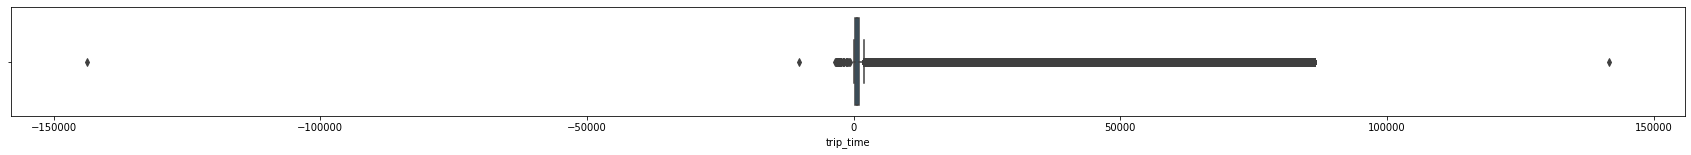

In [16]:
df['trip_time'] = df['trip_time'].dt.total_seconds().astype(int)
plt.figure(figsize=[30,2])
sns.boxplot(df['trip_time'])

In [17]:
df['trip_time'].sort_values(ascending=False)

10045718    141560
10019474     86399
5529140      86398
5415045      86398
1842056      86398
             ...  
5456995      -3254
5456608      -3270
5456821      -3414
5622762     -10152
9366561    -143765
Name: trip_time, Length: 11740514, dtype: int64

In [ ]:
#df.drop(df[df['trip_time'] > 90000].index, inplace = True)
#df.drop(df[df['trip_time'] < 10 ].index, inplace = True)

### Trip Distance


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


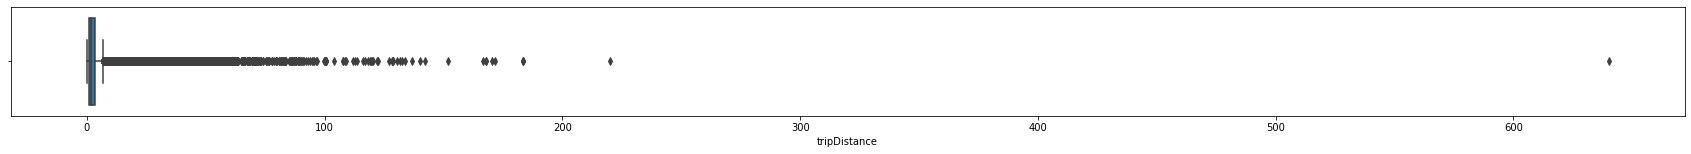

In [18]:
plt.figure(figsize=[30,2])
sns.boxplot(df['tripDistance'])

In [19]:
df['tripDistance'].loc[(df['tripDistance'] == 0)].count()

135733

In [20]:
df['tripDistance'].loc[(df['tripDistance'] > 200)].count()

2

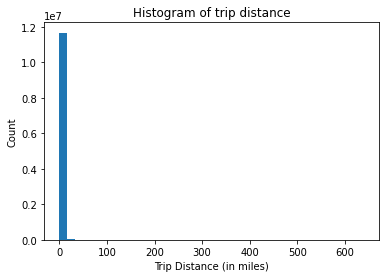

In [21]:
plt.hist(df['tripDistance'],bins = 40)
plt.title('Histogram of trip distance')
plt.xlabel('Trip Distance (in miles)')
plt.ylabel('Count')
plt.show()

In [22]:
df['tripDistance'].sort_values(ascending=False)

1503064    640.00
5011169    220.08
8580332    183.50
8571164    183.50
8580330    183.50
            ...  
4492863      0.00
4492796      0.00
4492620      0.00
4492516      0.00
737703       0.00
Name: tripDistance, Length: 11740514, dtype: float64

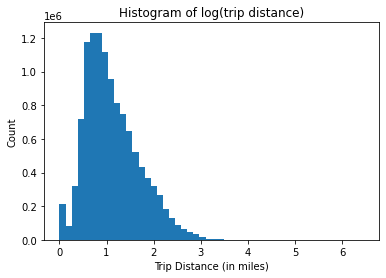

In [23]:
df['log_tripDistance'] = np.log(df['tripDistance']+1)
plt.hist(df['log_tripDistance'],bins=50)
plt.title('Histogram of log(trip distance)')
plt.xlabel('Trip Distance (in miles)')
plt.ylabel('Count')
plt.show()

### Passenger Count

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


1    9887286
2     938995
5     416220
3     221036
6     203442
4      71048
0       1843
8        286
7        266
9         92
Name: passengerCount, dtype: int64


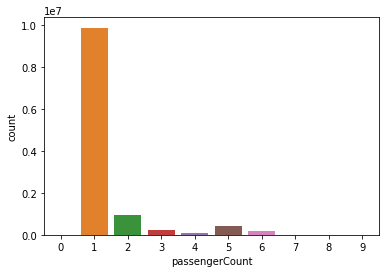

In [24]:
sns.countplot(df['passengerCount'])
print(df.passengerCount.value_counts())

### Pickup Time

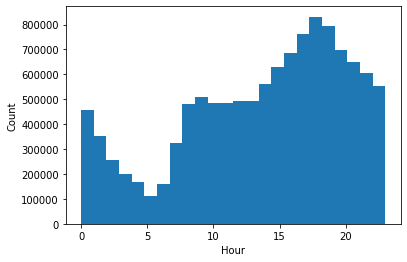

In [25]:
df['hour'] = pd.DatetimeIndex(df['lpepPickupDatetime']).hour
plt.hist(df['hour'],bins = 24)
plt.xlabel('Hour')
plt.ylabel('Count')
plt.show()

### Fare Amount

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


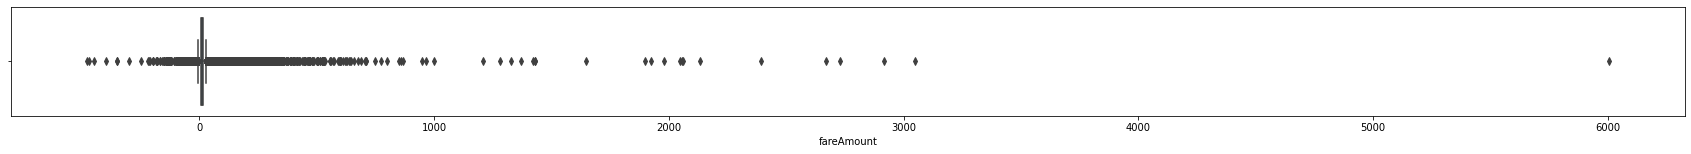

In [26]:
plt.figure(figsize=[30,2])
sns.boxplot(df['fareAmount'])

In [27]:
df['fareAmount'].sort_values(ascending=False)

5249317     6003.50
9877489     3050.50
11191994    2915.00
10731056    2730.50
3115938     2667.50
             ...   
8082645     -350.00
6101439     -400.09
3390467     -450.00
1249769     -470.00
7673630     -480.00
Name: fareAmount, Length: 11740514, dtype: float64

In [28]:
print(df['fareAmount'].loc[(df['fareAmount'] < 0)].count())

26638


### Tip Amount

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


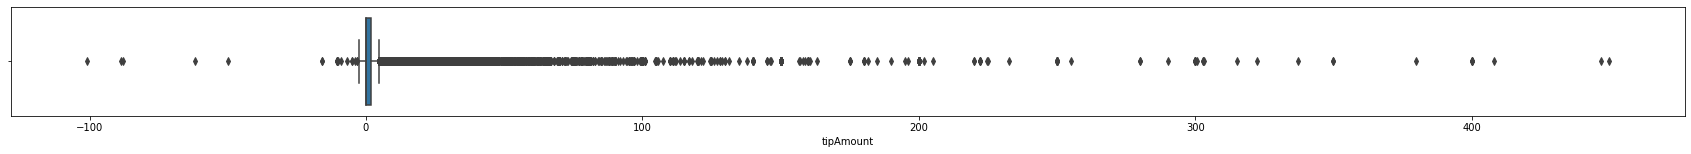

In [29]:
plt.figure(figsize=[30,2])
sns.boxplot(df['tipAmount'])

In [30]:
df['tipAmount'].sort_values(ascending=False)

3632661     449.56
1515467     446.79
10908100    408.00
10004905    400.00
10908101    400.00
             ...  
8369933     -50.00
8106867     -62.00
938932      -88.00
9368056     -88.80
491583     -101.00
Name: tipAmount, Length: 11740514, dtype: float64

In [ ]:
### Month

In [34]:
df['month'] = pd.DatetimeIndex(df['lpepPickupDatetime']).month
df.head()

,vendorID,lpepPickupDatetime,lpepDropoffDatetime,passengerCount,tripDistance,puLocationId,doLocationId,rateCodeID,storeAndFwdFlag,paymentType,fareAmount,extra,mtaTax,improvementSurcharge,tipAmount,tollsAmount,totalAmount,trip_time,log_tripDistance,hour,month
0,2,2017-01-02 10:41:24,2017-01-02 10:44:14,2,0.84,61,61,1,N,2,4.5,0.0,0.5,0.3,0.0,0.0,5.3,170,0.609766,10,1
1,2,2017-01-02 10:34:53,2017-01-02 10:44:44,1,1.80,74,166,1,N,2,8.5,0.0,0.5,0.3,0.0,0.0,9.3,591,1.029619,10,1
2,2,2017-01-02 10:36:35,2017-01-02 10:44:26,1,1.70,181,188,1,N,2,8.0,0.0,0.5,0.3,0.0,0.0,8.8,471,0.993252,10,1
3,2,2017-01-02 10:29:01,2017-01-02 10:44:44,1,3.95,7,161,1,N,2,14.5,0.0,0.5,0.3,0.0,0.0,15.3,943,1.599388,10,1
4,2,2017-01-02 10:39:52,2017-01-02 10:44:55,1,1.00,42,41,1,N,2,6.0,0.0,0.5,0.3,0.0,0.0,6.8,303,0.693147,10,1


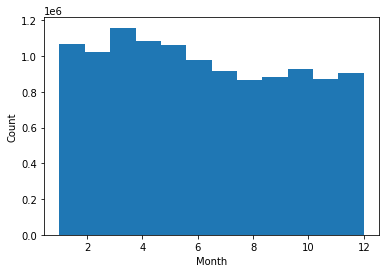

In [35]:
plt.hist(df['month'],bins = 12)
plt.xlabel('Month')
plt.ylabel('Count')
plt.show()

-----------------


## 2016

In [2]:
from google.colab import drive
drive.mount("/content/drive", force_remount=True)
arr = []
for filename in glob.iglob('/content/drive/MyDrive/green2/puYear=2016/**/*.parquet',recursive = True):
  arr.append(pd.read_parquet(filename))
df = pd.concat(arr, ignore_index=True)
df.head()

Mounted at /content/drive


,vendorID,lpepPickupDatetime,lpepDropoffDatetime,passengerCount,tripDistance,puLocationId,doLocationId,pickupLongitude,pickupLatitude,dropoffLongitude,dropoffLatitude,rateCodeID,storeAndFwdFlag,paymentType,fareAmount,extra,mtaTax,improvementSurcharge,tipAmount,tollsAmount,ehailFee,totalAmount,tripType
0,2,2016-07-02 23:01:30,2016-07-02 23:08:18,5,2.35,95,28,NaN,NaN,NaN,NaN,1,N,2,9.0,0.5,0.5,0.3,0.00,0.0,NaN,10.30,1.0
1,2,2016-07-02 23:03:03,2016-07-02 23:08:06,1,0.94,181,25,NaN,NaN,NaN,NaN,1,N,2,5.5,0.5,0.5,0.3,0.00,0.0,NaN,6.80,1.0
2,2,2016-07-02 23:01:01,2016-07-02 23:08:28,1,1.80,74,24,NaN,NaN,NaN,NaN,1,N,1,7.5,0.5,0.5,0.3,1.76,0.0,NaN,10.56,1.0
3,2,2016-07-02 23:01:24,2016-07-02 23:08:06,1,0.82,129,129,NaN,NaN,NaN,NaN,1,N,2,6.0,0.5,0.5,0.3,0.00,0.0,NaN,7.30,1.0
4,2,2016-07-02 23:00:24,2016-07-03 00:00:00,1,2.01,243,235,NaN,NaN,NaN,NaN,1,N,2,8.5,0.5,0.5,0.3,0.00,0.0,NaN,9.80,1.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16385532 entries, 0 to 16385531
Data columns (total 23 columns):
 #   Column                Dtype         
---  ------                -----         
 0   vendorID              int32         
 1   lpepPickupDatetime    datetime64[ns]
 2   lpepDropoffDatetime   datetime64[ns]
 3   passengerCount        int32         
 4   tripDistance          float64       
 5   puLocationId          object        
 6   doLocationId          object        
 7   pickupLongitude       float64       
 8   pickupLatitude        float64       
 9   dropoffLongitude      float64       
 10  dropoffLatitude       float64       
 11  rateCodeID            int32         
 12  storeAndFwdFlag       object        
 13  paymentType           int32         
 14  fareAmount            float64       
 15  extra                 float64       
 16  mtaTax                float64       
 17  improvementSurcharge  object        
 18  tipAmount             float64       
 19

### NaN Values

In [4]:
df.isnull().sum()

vendorID                       0
lpepPickupDatetime             0
lpepDropoffDatetime            0
passengerCount                 0
tripDistance                   0
puLocationId             9018030
doLocationId             9018030
pickupLongitude          7367502
pickupLatitude           7367502
dropoffLongitude         7367502
dropoffLatitude          7367502
rateCodeID                     0
storeAndFwdFlag                0
paymentType                    0
fareAmount                     0
extra                          0
mtaTax                         0
improvementSurcharge           0
tipAmount                      0
tollsAmount                    0
ehailFee                16385532
totalAmount                    0
tripType                     472
dtype: int64

In [5]:
df.isnull().mean().round(2)*100

vendorID                  0.0
lpepPickupDatetime        0.0
lpepDropoffDatetime       0.0
passengerCount            0.0
tripDistance              0.0
puLocationId             55.0
doLocationId             55.0
pickupLongitude          45.0
pickupLatitude           45.0
dropoffLongitude         45.0
dropoffLatitude          45.0
rateCodeID                0.0
storeAndFwdFlag           0.0
paymentType               0.0
fareAmount                0.0
extra                     0.0
mtaTax                    0.0
improvementSurcharge      0.0
tipAmount                 0.0
tollsAmount               0.0
ehailFee                100.0
totalAmount               0.0
tripType                  0.0
dtype: float64

In [6]:
df = df.loc[:,df.isnull().mean() == 0]
df.head()

,vendorID,lpepPickupDatetime,lpepDropoffDatetime,passengerCount,tripDistance,rateCodeID,storeAndFwdFlag,paymentType,fareAmount,extra,mtaTax,improvementSurcharge,tipAmount,tollsAmount,totalAmount
0,2,2016-07-02 23:01:30,2016-07-02 23:08:18,5,2.35,1,N,2,9.0,0.5,0.5,0.3,0.00,0.0,10.30
1,2,2016-07-02 23:03:03,2016-07-02 23:08:06,1,0.94,1,N,2,5.5,0.5,0.5,0.3,0.00,0.0,6.80
2,2,2016-07-02 23:01:01,2016-07-02 23:08:28,1,1.80,1,N,1,7.5,0.5,0.5,0.3,1.76,0.0,10.56
3,2,2016-07-02 23:01:24,2016-07-02 23:08:06,1,0.82,1,N,2,6.0,0.5,0.5,0.3,0.00,0.0,7.30
4,2,2016-07-02 23:00:24,2016-07-03 00:00:00,1,2.01,1,N,2,8.5,0.5,0.5,0.3,0.00,0.0,9.80


### Pre-Analysis

In [3]:
df.duplicated().sum()

96

In [ ]:
df = df.drop_duplicates()

In [7]:
df.nunique()

vendorID                       2
lpepPickupDatetime      12099654
lpepDropoffDatetime     12072618
passengerCount                10
tripDistance                5100
rateCodeID                     7
storeAndFwdFlag                2
paymentType                    5
fareAmount                  3322
extra                         29
mtaTax                         8
improvementSurcharge          91
tipAmount                   3908
tollsAmount                  647
totalAmount                12683
dtype: int64

In [8]:
df.describe()

,vendorID,passengerCount,tripDistance,rateCodeID,paymentType,fareAmount,extra,mtaTax,tipAmount,tollsAmount,totalAmount
count,1.638553e+07,1.638553e+07,1.638553e+07,1.638553e+07,1.638553e+07,1.638553e+07,1.638553e+07,1.638553e+07,1.638553e+07,1.638553e+07,1.638553e+07
mean,1.790590e+00,1.357557e+00,2.802718e+00,1.094279e+00,1.514710e+00,1.213675e+01,3.522082e-01,4.867317e-01,1.243873e+00,1.103113e-01,1.464115e+01
std,4.068873e-01,1.024279e+00,2.941111e+00,7.891883e-01,5.253130e-01,1.027957e+01,3.818636e-01,8.618982e-02,2.559969e+00,1.073319e+00,1.173573e+01
min,1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,-4.990000e+02,-4.500000e+00,-5.000000e-01,-6.000000e+01,-5.000000e+01,-4.990000e+02
25%,2.000000e+00,1.000000e+00,1.030000e+00,1.000000e+00,1.000000e+00,6.500000e+00,0.000000e+00,5.000000e-01,0.000000e+00,0.000000e+00,7.800000e+00
50%,2.000000e+00,1.000000e+00,1.840000e+00,1.000000e+00,2.000000e+00,9.500000e+00,5.000000e-01,5.000000e-01,0.000000e+00,0.000000e+00,1.130000e+01
75%,2.000000e+00,1.000000e+00,3.500000e+00,1.000000e+00,2.000000e+00,1.500000e+01,5.000000e-01,5.000000e-01,2.000000e+00,0.000000e+00,1.775000e+01
max,2.000000e+00,9.000000e+00,8.322000e+02,9.900000e+01,5.000000e+00,5.005500e+03,8.300000e+01,3.000000e+00,9.000000e+02,9.021700e+02,5.006300e+03


### Trip Duration 

In [9]:
df['trip_time'] = df['lpepDropoffDatetime']-df['lpepPickupDatetime']
#df['trip_time'] = df['trip_time'].dt.total_seconds().astype(int)
df.head()

,vendorID,lpepPickupDatetime,lpepDropoffDatetime,passengerCount,tripDistance,rateCodeID,storeAndFwdFlag,paymentType,fareAmount,extra,mtaTax,improvementSurcharge,tipAmount,tollsAmount,totalAmount,trip_time
0,2,2016-07-02 23:01:30,2016-07-02 23:08:18,5,2.35,1,N,2,9.0,0.5,0.5,0.3,0.00,0.0,10.30,0 days 00:06:48
1,2,2016-07-02 23:03:03,2016-07-02 23:08:06,1,0.94,1,N,2,5.5,0.5,0.5,0.3,0.00,0.0,6.80,0 days 00:05:03
2,2,2016-07-02 23:01:01,2016-07-02 23:08:28,1,1.80,1,N,1,7.5,0.5,0.5,0.3,1.76,0.0,10.56,0 days 00:07:27
3,2,2016-07-02 23:01:24,2016-07-02 23:08:06,1,0.82,1,N,2,6.0,0.5,0.5,0.3,0.00,0.0,7.30,0 days 00:06:42
4,2,2016-07-02 23:00:24,2016-07-03 00:00:00,1,2.01,1,N,2,8.5,0.5,0.5,0.3,0.00,0.0,9.80,0 days 00:59:36


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


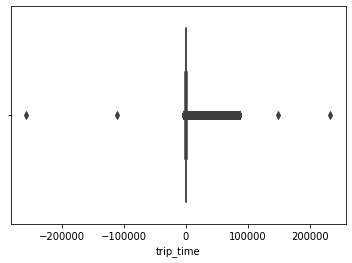

In [10]:
df['trip_time'] = df['trip_time'].dt.total_seconds().astype(int)
#plt.figure(figsize=[30,2])
sns.boxplot(df['trip_time'])

In [11]:
df['trip_time'].sort_values(ascending=False)

5538942     233138
14419932    149274
2570999      86399
5887996      86399
35655        86399
             ...  
8149716      -3388
8149718      -3426
8149739      -3452
1217006    -110785
8529594    -257830
Name: trip_time, Length: 16385532, dtype: int64

### Trip Distance

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


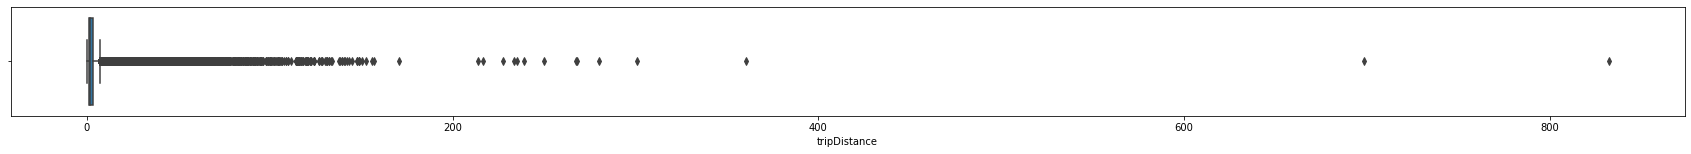

In [12]:
plt.figure(figsize=[30,2])
sns.boxplot(df['tripDistance'])

In [13]:
df['tripDistance'].loc[(df['tripDistance'] == 0)].count()

218025

In [14]:
df['tripDistance'].loc[(df['tripDistance'] > 200)].count()

14

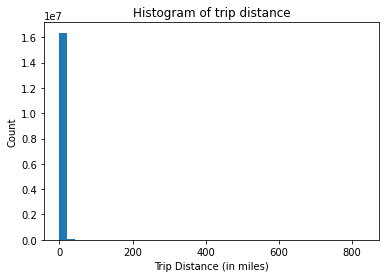

In [15]:
plt.hist(df['tripDistance'],bins = 40)
plt.title('Histogram of trip distance')
plt.xlabel('Trip Distance (in miles)')
plt.ylabel('Count')
plt.show()

In [16]:
df['tripDistance'].sort_values(ascending=False)

15521442    832.20
7255299     698.56
2901583     360.50
13068830    301.00
2805213     280.16
             ...  
3521628       0.00
6656577       0.00
6656562       0.00
10743061      0.00
11747638      0.00
Name: tripDistance, Length: 16385532, dtype: float64

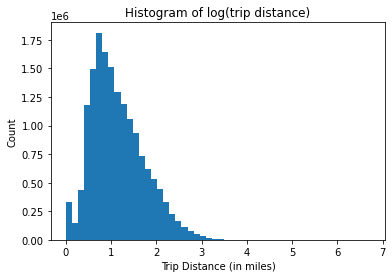

In [17]:
df['log_tripDistance'] = np.log(df['tripDistance']+1)
plt.hist(df['log_tripDistance'],bins=50)
plt.title('Histogram of log(trip distance)')
plt.xlabel('Trip Distance (in miles)')
plt.ylabel('Count')
plt.show()

### Passenger Count

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


1    13838473
2     1251744
5      564322
3      353593
6      262247
4      109868
0        4375
7         404
8         391
9         115
Name: passengerCount, dtype: int64


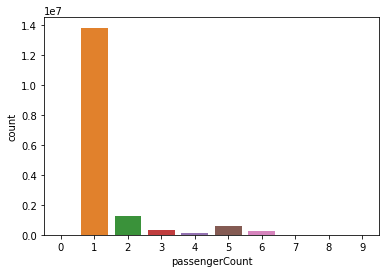

In [18]:
sns.countplot(df['passengerCount'])
print(df.passengerCount.value_counts())

### Pickup Time

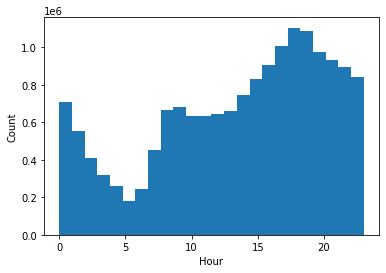

In [19]:
df['hour'] = pd.DatetimeIndex(df['lpepPickupDatetime']).hour
plt.hist(df['hour'],bins = 24)
plt.xlabel('Hour')
plt.ylabel('Count')
plt.show()

### Fare Amount

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


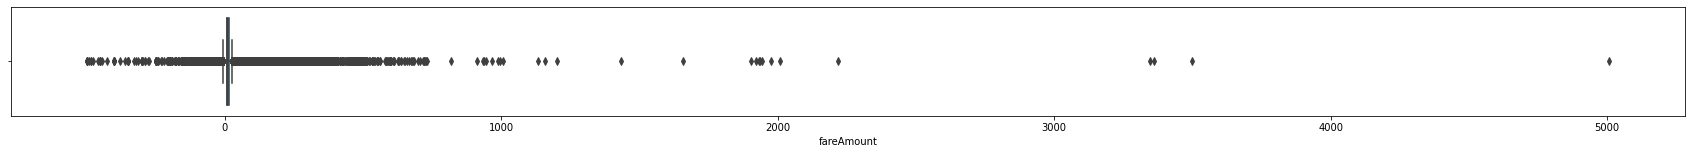

In [20]:
plt.figure(figsize=[30,2])
sns.boxplot(df['fareAmount'])

In [21]:
df['fareAmount'].sort_values(ascending=False)

7343505     5005.5
11318729    3498.5
5928701     3361.0
2446016     3347.5
4234561     2219.5
             ...  
2788398     -492.8
7866438     -499.0
13628512    -499.0
7946426     -499.0
1880787     -499.0
Name: fareAmount, Length: 16385532, dtype: float64

In [22]:
print(df['fareAmount'].loc[(df['fareAmount'] < 0)].count())

32982


### Tip Amount

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


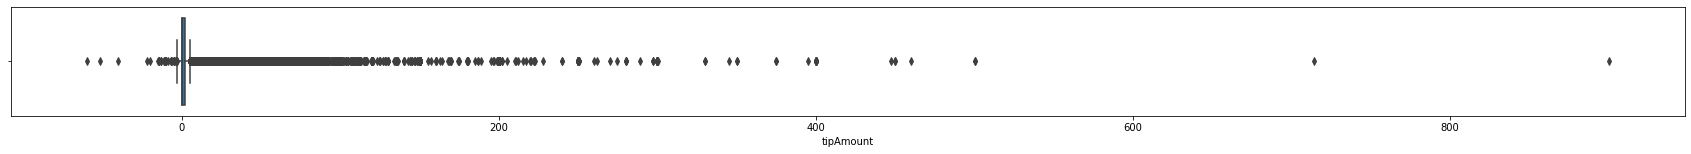

In [23]:
plt.figure(figsize=[30,2])
sns.boxplot(df['tipAmount'])

In [24]:
df['tipAmount'].sort_values(ascending=False)

11644259    900.00
5423814     714.00
4638313     500.00
15927249    499.99
5405098     460.00
             ...  
16217106    -20.00
14979580    -22.00
6052274     -40.00
8914754     -51.41
12806390    -60.00
Name: tipAmount, Length: 16385532, dtype: float64

### Month

In [26]:
df['month'] = pd.DatetimeIndex(df['lpepPickupDatetime']).month
df.head()

,vendorID,lpepPickupDatetime,lpepDropoffDatetime,passengerCount,tripDistance,rateCodeID,storeAndFwdFlag,paymentType,fareAmount,extra,mtaTax,improvementSurcharge,tipAmount,tollsAmount,totalAmount,trip_time,log_tripDistance,hour,month
0,2,2016-07-02 23:01:30,2016-07-02 23:08:18,5,2.35,1,N,2,9.0,0.5,0.5,0.3,0.00,0.0,10.30,408,1.208960,23,7
1,2,2016-07-02 23:03:03,2016-07-02 23:08:06,1,0.94,1,N,2,5.5,0.5,0.5,0.3,0.00,0.0,6.80,303,0.662688,23,7
2,2,2016-07-02 23:01:01,2016-07-02 23:08:28,1,1.80,1,N,1,7.5,0.5,0.5,0.3,1.76,0.0,10.56,447,1.029619,23,7
3,2,2016-07-02 23:01:24,2016-07-02 23:08:06,1,0.82,1,N,2,6.0,0.5,0.5,0.3,0.00,0.0,7.30,402,0.598837,23,7
4,2,2016-07-02 23:00:24,2016-07-03 00:00:00,1,2.01,1,N,2,8.5,0.5,0.5,0.3,0.00,0.0,9.80,3576,1.101940,23,7


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


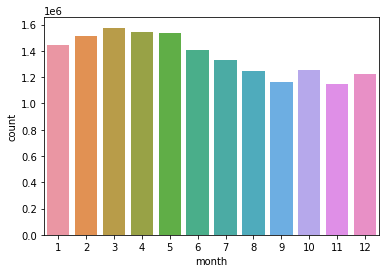

In [27]:
sns.countplot(df['month'])

---------------------


## 2014


In [2]:
from google.colab import drive
drive.mount("/content/drive", force_remount=True)
arr = []
for filename in glob.iglob('/content/drive/MyDrive/green2/puYear=2014/**/*.parquet',recursive = True):
  arr.append(pd.read_parquet(filename))
df = pd.concat(arr, ignore_index=True)
df.head()

Mounted at /content/drive


,vendorID,lpepPickupDatetime,lpepDropoffDatetime,passengerCount,tripDistance,puLocationId,doLocationId,pickupLongitude,pickupLatitude,dropoffLongitude,dropoffLatitude,rateCodeID,storeAndFwdFlag,paymentType,fareAmount,extra,mtaTax,improvementSurcharge,tipAmount,tollsAmount,ehailFee,totalAmount,tripType
0,2,2014-06-02 06:23:07,2014-06-02 06:28:04,1,0.93,None,None,-73.907616,40.826912,-73.917290,40.816303,1,N,1,5.5,0.0,0.5,None,1.1,0.0,NaN,7.1,1.0
1,1,2014-06-02 06:23:10,2014-06-02 07:00:30,1,19.40,None,None,-73.991997,40.688919,-73.778069,40.644890,1,N,1,51.5,0.0,0.5,None,13.0,0.0,NaN,65.0,1.0
2,2,2014-06-02 06:23:11,2014-06-02 06:29:16,1,1.47,None,None,-73.938286,40.822964,-73.938614,40.808208,1,N,2,7.0,0.0,0.5,None,0.0,0.0,NaN,7.5,1.0
3,1,2014-06-02 06:23:23,2014-06-02 06:39:33,1,3.50,None,None,-73.956711,40.746174,-73.985489,40.759514,1,N,1,14.0,0.0,0.5,None,8.5,0.0,NaN,23.0,1.0
4,1,2014-06-02 06:23:27,2014-06-02 06:28:49,1,1.10,None,None,-73.938988,40.804878,-73.954941,40.805157,1,N,2,6.0,0.0,0.5,None,0.0,0.0,NaN,6.5,1.0


In [88]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15837001 entries, 0 to 15837000
Data columns (total 23 columns):
 #   Column                Dtype         
---  ------                -----         
 0   vendorID              int32         
 1   lpepPickupDatetime    datetime64[ns]
 2   lpepDropoffDatetime   datetime64[ns]
 3   passengerCount        int32         
 4   tripDistance          float64       
 5   puLocationId          object        
 6   doLocationId          object        
 7   pickupLongitude       float64       
 8   pickupLatitude        float64       
 9   dropoffLongitude      float64       
 10  dropoffLatitude       float64       
 11  rateCodeID            int32         
 12  storeAndFwdFlag       object        
 13  paymentType           int32         
 14  fareAmount            float64       
 15  extra                 float64       
 16  mtaTax                float64       
 17  improvementSurcharge  object        
 18  tipAmount             float64       
 19

### NaN Values

In [89]:
df.isnull().sum()

vendorID                       0
lpepPickupDatetime             0
lpepDropoffDatetime            0
passengerCount                 0
tripDistance                   0
puLocationId            15837001
doLocationId            15837001
pickupLongitude                0
pickupLatitude                 0
dropoffLongitude               0
dropoffLatitude                0
rateCodeID                     0
storeAndFwdFlag                0
paymentType                    0
fareAmount                     0
extra                          0
mtaTax                         0
improvementSurcharge    15837001
tipAmount                      0
tollsAmount                    0
ehailFee                15837001
totalAmount                    0
tripType                 1778917
dtype: int64

In [90]:
df.isnull().mean().round(2)*100

vendorID                  0.0
lpepPickupDatetime        0.0
lpepDropoffDatetime       0.0
passengerCount            0.0
tripDistance              0.0
puLocationId            100.0
doLocationId            100.0
pickupLongitude           0.0
pickupLatitude            0.0
dropoffLongitude          0.0
dropoffLatitude           0.0
rateCodeID                0.0
storeAndFwdFlag           0.0
paymentType               0.0
fareAmount                0.0
extra                     0.0
mtaTax                    0.0
improvementSurcharge    100.0
tipAmount                 0.0
tollsAmount               0.0
ehailFee                100.0
totalAmount               0.0
tripType                 11.0
dtype: float64

In [91]:
df = df.loc[:,df.isnull().mean() == 0]
df.head()

,vendorID,lpepPickupDatetime,lpepDropoffDatetime,passengerCount,tripDistance,pickupLongitude,pickupLatitude,dropoffLongitude,dropoffLatitude,rateCodeID,storeAndFwdFlag,paymentType,fareAmount,extra,mtaTax,tipAmount,tollsAmount,totalAmount
0,2,2014-06-02 06:23:07,2014-06-02 06:28:04,1,0.93,-73.907616,40.826912,-73.917290,40.816303,1,N,1,5.5,0.0,0.5,1.1,0.0,7.1
1,1,2014-06-02 06:23:10,2014-06-02 07:00:30,1,19.40,-73.991997,40.688919,-73.778069,40.644890,1,N,1,51.5,0.0,0.5,13.0,0.0,65.0
2,2,2014-06-02 06:23:11,2014-06-02 06:29:16,1,1.47,-73.938286,40.822964,-73.938614,40.808208,1,N,2,7.0,0.0,0.5,0.0,0.0,7.5
3,1,2014-06-02 06:23:23,2014-06-02 06:39:33,1,3.50,-73.956711,40.746174,-73.985489,40.759514,1,N,1,14.0,0.0,0.5,8.5,0.0,23.0
4,1,2014-06-02 06:23:27,2014-06-02 06:28:49,1,1.10,-73.938988,40.804878,-73.954941,40.805157,1,N,2,6.0,0.0,0.5,0.0,0.0,6.5


### Pre-Analysis

In [3]:
df.duplicated().sum()

161

In [ ]:
df = df.drop_duplicates()

In [92]:
df.nunique()

vendorID                      2
lpepPickupDatetime     11734824
lpepDropoffDatetime    11745808
passengerCount               10
tripDistance               4768
pickupLongitude           44065
pickupLatitude            87371
dropoffLongitude          58146
dropoffLatitude           99626
rateCodeID                    7
storeAndFwdFlag               2
paymentType                   5
fareAmount                 1916
extra                       132
mtaTax                       11
tipAmount                  3190
tollsAmount                 596
totalAmount                9604
dtype: int64

In [93]:
df.describe()

,vendorID,passengerCount,tripDistance,pickupLongitude,pickupLatitude,dropoffLongitude,dropoffLatitude,rateCodeID,paymentType,fareAmount,extra,mtaTax,tipAmount,tollsAmount,totalAmount
count,1.583700e+07,1.583700e+07,1.583700e+07,1.583700e+07,1.583700e+07,1.583700e+07,1.583700e+07,1.583700e+07,1.583700e+07,1.583700e+07,1.583700e+07,1.583700e+07,1.583700e+07,1.583700e+07,1.583700e+07
mean,1.778878e+00,1.428516e+00,2.977236e+00,-7.380960e+01,4.068850e+01,-7.381732e+01,4.069003e+01,1.092027e+00,1.593632e+00,1.247859e+01,3.587162e-01,4.887337e-01,1.086751e+00,1.142800e-01,1.453684e+01
std,4.150023e-01,1.130925e+00,2.989341e+00,3.020560e+00,1.665827e+00,2.925306e+00,1.613167e+00,6.195169e-01,5.109270e-01,1.029742e+01,4.455739e-01,7.650566e-02,2.566247e+00,1.223682e+00,2.823014e+01
min,1.000000e+00,0.000000e+00,0.000000e+00,-1.219263e+02,-4.075827e+01,-1.219265e+02,0.000000e+00,1.000000e+00,1.000000e+00,-4.990000e+02,-1.000000e+00,-1.500000e+00,-1.000000e+02,-1.750000e+01,-4.990000e+02
25%,2.000000e+00,1.000000e+00,1.100000e+00,-7.395803e+01,4.071124e+01,-7.396690e+01,4.071163e+01,1.000000e+00,1.000000e+00,6.500000e+00,0.000000e+00,5.000000e-01,0.000000e+00,0.000000e+00,7.500000e+00
50%,2.000000e+00,1.000000e+00,2.000000e+00,-7.394343e+01,4.075038e+01,-7.394363e+01,4.075340e+01,1.000000e+00,2.000000e+00,9.500000e+00,5.000000e-01,5.000000e-01,0.000000e+00,0.000000e+00,1.100000e+01
75%,2.000000e+00,1.000000e+00,3.820000e+00,-7.391383e+01,4.080545e+01,-7.390710e+01,4.079893e+01,1.000000e+00,2.000000e+00,1.550000e+01,5.000000e-01,5.000000e-01,1.700000e+00,0.000000e+00,1.790000e+01
max,2.000000e+00,9.000000e+00,6.881000e+02,7.393764e+01,4.290093e+01,0.000000e+00,4.448901e+01,9.900000e+01,5.000000e+00,4.543000e+03,5.658400e+02,7.350000e+00,9.312900e+02,1.600080e+03,8.806493e+04


### Trip Duration 

In [94]:
df['trip_time'] = df['lpepDropoffDatetime']-df['lpepPickupDatetime']
#df['trip_time'] = df['trip_time'].dt.total_seconds().astype(int)
df.head()

,vendorID,lpepPickupDatetime,lpepDropoffDatetime,passengerCount,tripDistance,pickupLongitude,pickupLatitude,dropoffLongitude,dropoffLatitude,rateCodeID,storeAndFwdFlag,paymentType,fareAmount,extra,mtaTax,tipAmount,tollsAmount,totalAmount,trip_time
0,2,2014-06-02 06:23:07,2014-06-02 06:28:04,1,0.93,-73.907616,40.826912,-73.917290,40.816303,1,N,1,5.5,0.0,0.5,1.1,0.0,7.1,0 days 00:04:57
1,1,2014-06-02 06:23:10,2014-06-02 07:00:30,1,19.40,-73.991997,40.688919,-73.778069,40.644890,1,N,1,51.5,0.0,0.5,13.0,0.0,65.0,0 days 00:37:20
2,2,2014-06-02 06:23:11,2014-06-02 06:29:16,1,1.47,-73.938286,40.822964,-73.938614,40.808208,1,N,2,7.0,0.0,0.5,0.0,0.0,7.5,0 days 00:06:05
3,1,2014-06-02 06:23:23,2014-06-02 06:39:33,1,3.50,-73.956711,40.746174,-73.985489,40.759514,1,N,1,14.0,0.0,0.5,8.5,0.0,23.0,0 days 00:16:10
4,1,2014-06-02 06:23:27,2014-06-02 06:28:49,1,1.10,-73.938988,40.804878,-73.954941,40.805157,1,N,2,6.0,0.0,0.5,0.0,0.0,6.5,0 days 00:05:22


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


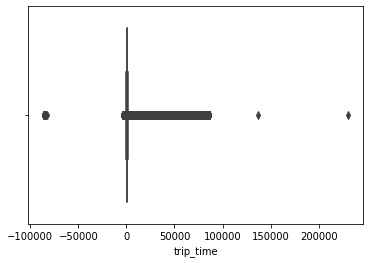

In [95]:
df['trip_time'] = df['trip_time'].dt.total_seconds().astype(int)
#plt.figure(figsize=[30,2])
sns.boxplot(df['trip_time'])

In [96]:
df['trip_time'].sort_values(ascending=False)

1004707     230302
12982187    136797
11819502     86399
12048475     86399
1807781      86398
             ...  
14230625    -85980
14579086    -86100
2693916     -86100
93710       -86160
9997590     -86160
Name: trip_time, Length: 15837001, dtype: int64

### Trip Distance

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


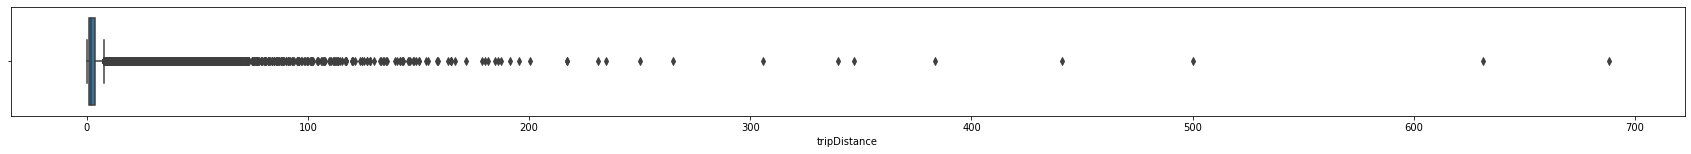

In [97]:
plt.figure(figsize=[30,2])
sns.boxplot(df['tripDistance'])

In [98]:
df['tripDistance'].loc[(df['tripDistance'] == 0)].count()

241457

In [99]:
df['tripDistance'].loc[(df['tripDistance'] > 200)].count()

15

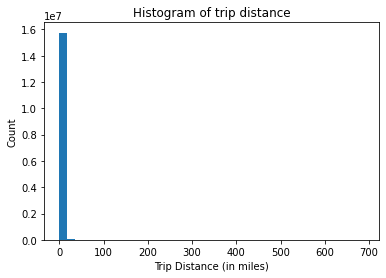

In [100]:
plt.hist(df['tripDistance'],bins = 40)
plt.title('Histogram of trip distance')
plt.xlabel('Trip Distance (in miles)')
plt.ylabel('Count')
plt.show()

In [101]:
df['tripDistance'].sort_values(ascending=False)

8629810     688.10
9080463     631.10
457107      500.00
2066399     440.96
5916402     383.64
             ...  
10307962      0.00
12112726      0.00
15150925      0.00
13257922      0.00
13268109      0.00
Name: tripDistance, Length: 15837001, dtype: float64

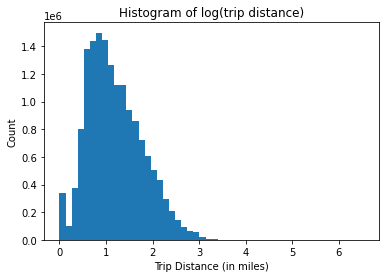

In [102]:
df['log_tripDistance'] = np.log(df['tripDistance']+1)
plt.hist(df['log_tripDistance'],bins=50)
plt.title('Histogram of log(trip distance)')
plt.xlabel('Trip Distance (in miles)')
plt.ylabel('Count')
plt.show()

### Passenger Count

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


1    13112797
2     1162332
5      781022
3      377361
6      272599
4      126728
0        3346
7         367
8         366
9          83
Name: passengerCount, dtype: int64


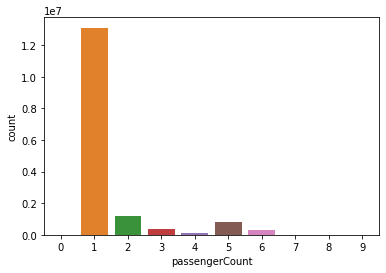

In [103]:
sns.countplot(df['passengerCount'])
print(df.passengerCount.value_counts())

### Pickup Time

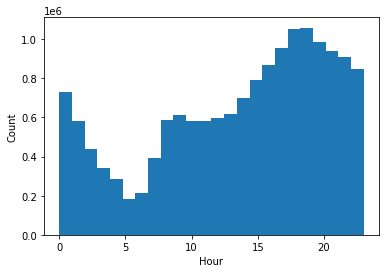

In [104]:
df['hour'] = pd.DatetimeIndex(df['lpepPickupDatetime']).hour
plt.hist(df['hour'],bins = 24)
plt.xlabel('Hour')
plt.ylabel('Count')
plt.show()

### Fare Amount

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


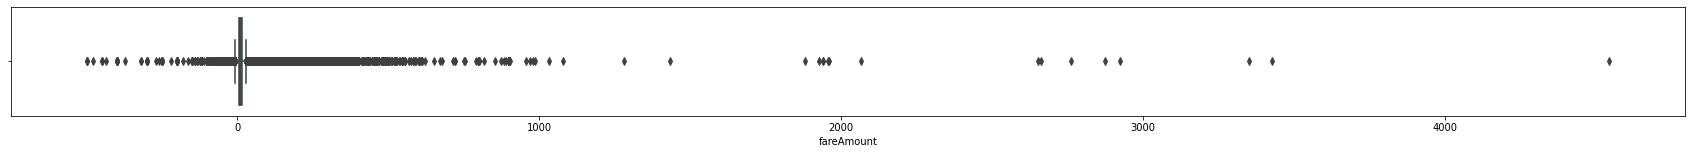

In [105]:
plt.figure(figsize=[30,2])
sns.boxplot(df['fareAmount'])

In [106]:
df['fareAmount'].sort_values(ascending=False)

12313636    4543.0
96909       3427.5
9195307     3351.0
2973693     2924.5
5581268     2875.5
             ...  
7355973     -450.0
11114322    -480.0
9009976     -499.0
8233535     -499.0
8230345     -499.0
Name: fareAmount, Length: 15837001, dtype: float64

In [107]:
print(df['fareAmount'].loc[(df['fareAmount'] < 0)].count())

11626


### Tip Amount

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


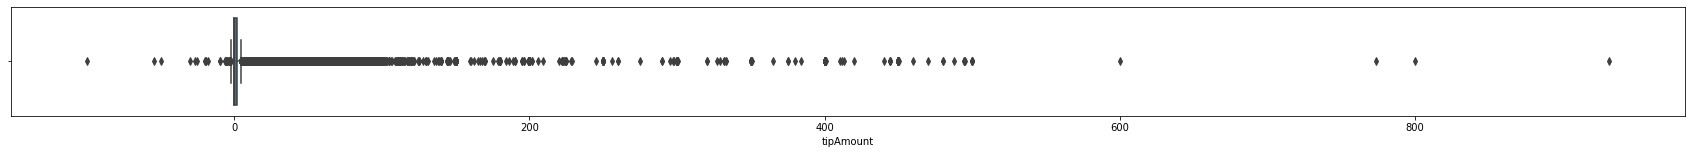

In [108]:
plt.figure(figsize=[30,2])
sns.boxplot(df['tipAmount'])

In [109]:
df['tipAmount'].sort_values(ascending=False)

6067321     931.29
6516337     800.00
10761883    773.33
6657943     600.00
1377067     500.00
             ...  
2009107     -27.00
7395876     -30.00
4196120     -50.00
10985338    -54.52
8902756    -100.00
Name: tipAmount, Length: 15837001, dtype: float64

### Month

In [110]:
df['month'] = pd.DatetimeIndex(df['lpepPickupDatetime']).month
df.head()

,vendorID,lpepPickupDatetime,lpepDropoffDatetime,passengerCount,tripDistance,pickupLongitude,pickupLatitude,dropoffLongitude,dropoffLatitude,rateCodeID,storeAndFwdFlag,paymentType,fareAmount,extra,mtaTax,tipAmount,tollsAmount,totalAmount,trip_time,log_tripDistance,hour,month
0,2,2014-06-02 06:23:07,2014-06-02 06:28:04,1,0.93,-73.907616,40.826912,-73.917290,40.816303,1,N,1,5.5,0.0,0.5,1.1,0.0,7.1,297,0.657520,6,6
1,1,2014-06-02 06:23:10,2014-06-02 07:00:30,1,19.40,-73.991997,40.688919,-73.778069,40.644890,1,N,1,51.5,0.0,0.5,13.0,0.0,65.0,2240,3.015535,6,6
2,2,2014-06-02 06:23:11,2014-06-02 06:29:16,1,1.47,-73.938286,40.822964,-73.938614,40.808208,1,N,2,7.0,0.0,0.5,0.0,0.0,7.5,365,0.904218,6,6
3,1,2014-06-02 06:23:23,2014-06-02 06:39:33,1,3.50,-73.956711,40.746174,-73.985489,40.759514,1,N,1,14.0,0.0,0.5,8.5,0.0,23.0,970,1.504077,6,6
4,1,2014-06-02 06:23:27,2014-06-02 06:28:49,1,1.10,-73.938988,40.804878,-73.954941,40.805157,1,N,2,6.0,0.0,0.5,0.0,0.0,6.5,322,0.741937,6,6


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


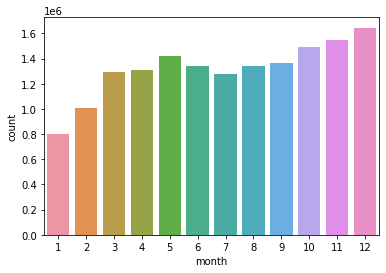

In [111]:
sns.countplot(df['month'])

---------------------


## 2013


In [2]:
from google.colab import drive
drive.mount("/content/drive", force_remount=True)
arr = []
for filename in glob.iglob('/content/drive/MyDrive/green2/puYear=2013/**/*.parquet',recursive = True):
  arr.append(pd.read_parquet(filename))
df = pd.concat(arr, ignore_index=True)
df.head()

Mounted at /content/drive


,vendorID,lpepPickupDatetime,lpepDropoffDatetime,passengerCount,tripDistance,puLocationId,doLocationId,pickupLongitude,pickupLatitude,dropoffLongitude,dropoffLatitude,rateCodeID,storeAndFwdFlag,paymentType,fareAmount,extra,mtaTax,improvementSurcharge,tipAmount,tollsAmount,ehailFee,totalAmount,tripType
0,2,2013-08-01 08:14:37,2013-08-01 09:09:06,1,0.0,None,None,0.0,0.0,0.0,0.0,1,N,2,21.25,0.0,0.0,None,0.0,0.0,NaN,21.25,NaN
1,2,2013-08-01 09:13:00,2013-08-01 11:38:00,2,0.0,None,None,0.0,0.0,0.0,0.0,1,N,2,74.50,0.0,0.5,None,0.0,0.0,NaN,75.00,NaN
2,2,2013-08-01 09:48:00,2013-08-01 09:49:00,1,0.0,None,None,0.0,0.0,0.0,0.0,5,N,2,1.00,0.1,0.0,None,0.0,1.0,NaN,2.10,NaN
3,2,2013-08-01 10:38:35,2013-08-01 10:38:51,1,0.0,None,None,0.0,0.0,0.0,0.0,1,N,2,3.25,0.0,0.0,None,0.0,0.0,NaN,3.25,NaN
4,2,2013-08-01 11:51:45,2013-08-01 12:03:52,1,0.0,None,None,0.0,0.0,0.0,0.0,1,N,2,8.50,0.0,0.5,None,0.0,0.0,NaN,9.00,NaN


### NaN Values

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1210811 entries, 0 to 1210810
Data columns (total 23 columns):
 #   Column                Non-Null Count    Dtype         
---  ------                --------------    -----         
 0   vendorID              1210811 non-null  int32         
 1   lpepPickupDatetime    1210811 non-null  datetime64[ns]
 2   lpepDropoffDatetime   1210811 non-null  datetime64[ns]
 3   passengerCount        1210811 non-null  int32         
 4   tripDistance          1210811 non-null  float64       
 5   puLocationId          0 non-null        object        
 6   doLocationId          0 non-null        object        
 7   pickupLongitude       1210811 non-null  float64       
 8   pickupLatitude        1210811 non-null  float64       
 9   dropoffLongitude      1210811 non-null  float64       
 10  dropoffLatitude       1210811 non-null  float64       
 11  rateCodeID            1210811 non-null  int32         
 12  storeAndFwdFlag       1210811 non-null  ob

In [4]:
df.isnull().mean().round(2)*100

vendorID                  0.0
lpepPickupDatetime        0.0
lpepDropoffDatetime       0.0
passengerCount            0.0
tripDistance              0.0
puLocationId            100.0
doLocationId            100.0
pickupLongitude           0.0
pickupLatitude            0.0
dropoffLongitude          0.0
dropoffLatitude           0.0
rateCodeID                0.0
storeAndFwdFlag           0.0
paymentType               0.0
fareAmount                0.0
extra                     0.0
mtaTax                    0.0
improvementSurcharge    100.0
tipAmount                 0.0
tollsAmount               0.0
ehailFee                100.0
totalAmount               0.0
tripType                 99.0
dtype: float64

In [5]:
df = df.loc[:,df.isnull().mean() == 0]
df.head()

,vendorID,lpepPickupDatetime,lpepDropoffDatetime,passengerCount,tripDistance,pickupLongitude,pickupLatitude,dropoffLongitude,dropoffLatitude,rateCodeID,storeAndFwdFlag,paymentType,fareAmount,extra,mtaTax,tipAmount,tollsAmount,totalAmount
0,2,2013-08-01 08:14:37,2013-08-01 09:09:06,1,0.0,0.0,0.0,0.0,0.0,1,N,2,21.25,0.0,0.0,0.0,0.0,21.25
1,2,2013-08-01 09:13:00,2013-08-01 11:38:00,2,0.0,0.0,0.0,0.0,0.0,1,N,2,74.50,0.0,0.5,0.0,0.0,75.00
2,2,2013-08-01 09:48:00,2013-08-01 09:49:00,1,0.0,0.0,0.0,0.0,0.0,5,N,2,1.00,0.1,0.0,0.0,1.0,2.10
3,2,2013-08-01 10:38:35,2013-08-01 10:38:51,1,0.0,0.0,0.0,0.0,0.0,1,N,2,3.25,0.0,0.0,0.0,0.0,3.25
4,2,2013-08-01 11:51:45,2013-08-01 12:03:52,1,0.0,0.0,0.0,0.0,0.0,1,N,2,8.50,0.0,0.5,0.0,0.0,9.00


### Pre-Analysis

In [3]:
df.duplicated().sum()

668

In [ ]:
df = df.drop_duplicates()

In [6]:
df.nunique()

vendorID                     2
lpepPickupDatetime     1083757
lpepDropoffDatetime    1091562
passengerCount              10
tripDistance              2978
pickupLongitude          28845
pickupLatitude           63574
dropoffLongitude         38032
dropoffLatitude          76513
rateCodeID                   7
storeAndFwdFlag              2
paymentType                  4
fareAmount                 688
extra                       98
mtaTax                      10
tipAmount                 1415
tollsAmount                191
totalAmount               4191
dtype: int64

In [7]:
df.describe()

,vendorID,passengerCount,tripDistance,pickupLongitude,pickupLatitude,dropoffLongitude,dropoffLatitude,rateCodeID,paymentType,fareAmount,extra,mtaTax,tipAmount,tollsAmount,totalAmount
count,1.210811e+06,1.210811e+06,1.210811e+06,1.210811e+06,1.210811e+06,1.210811e+06,1.210811e+06,1.210811e+06,1.210811e+06,1.210811e+06,1.210811e+06,1.210811e+06,1.210811e+06,1.210811e+06,1.210811e+06
mean,1.789673e+00,1.556307e+00,2.967329e+00,-7.370350e+01,4.065164e+01,-7.368230e+01,4.063350e+01,1.128194e+00,1.683049e+00,1.240426e+01,3.544673e-01,4.871240e-01,8.832160e-01,1.367803e-01,1.426701e+01
std,4.075409e-01,1.275560e+00,3.014140e+00,4.047587e+00,2.231871e+00,4.248888e+00,2.342542e+00,8.306852e-01,4.896365e-01,1.561308e+01,7.898858e-01,8.035075e-02,2.313167e+00,1.663348e+00,1.656752e+01
min,1.000000e+00,0.000000e+00,0.000000e+00,-1.219267e+02,0.000000e+00,-1.219277e+02,0.000000e+00,1.000000e+00,1.000000e+00,-5.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.000000e+00,1.000000e+00,1.080000e+00,-7.395338e+01,4.073424e+01,-7.396047e+01,4.073389e+01,1.000000e+00,1.000000e+00,6.500000e+00,0.000000e+00,5.000000e-01,0.000000e+00,0.000000e+00,7.500000e+00
50%,2.000000e+00,1.000000e+00,1.980000e+00,-7.393845e+01,4.077515e+01,-7.393826e+01,4.076548e+01,1.000000e+00,2.000000e+00,9.500000e+00,5.000000e-01,5.000000e-01,0.000000e+00,0.000000e+00,1.100000e+01
75%,2.000000e+00,1.000000e+00,3.830000e+00,-7.390269e+01,4.081075e+01,-7.389657e+01,4.080819e+01,1.000000e+00,2.000000e+00,1.550000e+01,5.000000e-01,5.000000e-01,1.000000e+00,0.000000e+00,1.750000e+01
max,2.000000e+00,9.000000e+00,1.550000e+02,0.000000e+00,4.269935e+01,0.000000e+00,4.277397e+01,9.900000e+01,4.000000e+00,9.999990e+03,6.795300e+02,3.000000e+00,1.170000e+03,9.500000e+02,1.000099e+04


### Trip Duration 

In [8]:
df['trip_time'] = df['lpepDropoffDatetime']-df['lpepPickupDatetime']
#df['trip_time'] = df['trip_time'].dt.total_seconds().astype(int)
df.head()

,vendorID,lpepPickupDatetime,lpepDropoffDatetime,passengerCount,tripDistance,pickupLongitude,pickupLatitude,dropoffLongitude,dropoffLatitude,rateCodeID,storeAndFwdFlag,paymentType,fareAmount,extra,mtaTax,tipAmount,tollsAmount,totalAmount,trip_time
0,2,2013-08-01 08:14:37,2013-08-01 09:09:06,1,0.0,0.0,0.0,0.0,0.0,1,N,2,21.25,0.0,0.0,0.0,0.0,21.25,0 days 00:54:29
1,2,2013-08-01 09:13:00,2013-08-01 11:38:00,2,0.0,0.0,0.0,0.0,0.0,1,N,2,74.50,0.0,0.5,0.0,0.0,75.00,0 days 02:25:00
2,2,2013-08-01 09:48:00,2013-08-01 09:49:00,1,0.0,0.0,0.0,0.0,0.0,5,N,2,1.00,0.1,0.0,0.0,1.0,2.10,0 days 00:01:00
3,2,2013-08-01 10:38:35,2013-08-01 10:38:51,1,0.0,0.0,0.0,0.0,0.0,1,N,2,3.25,0.0,0.0,0.0,0.0,3.25,0 days 00:00:16
4,2,2013-08-01 11:51:45,2013-08-01 12:03:52,1,0.0,0.0,0.0,0.0,0.0,1,N,2,8.50,0.0,0.5,0.0,0.0,9.00,0 days 00:12:07


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


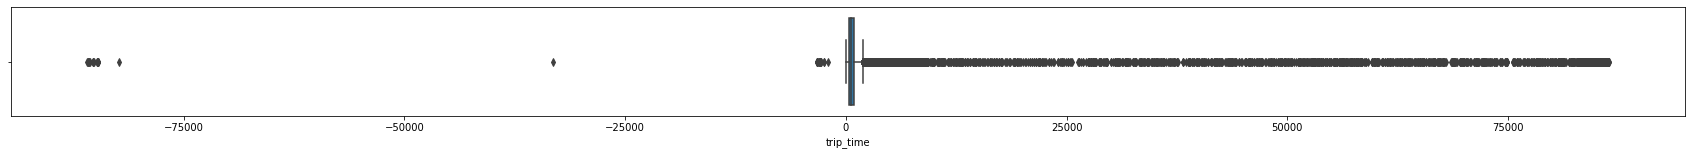

In [9]:
df['trip_time'] = df['trip_time'].dt.total_seconds().astype(int)
plt.figure(figsize=[30,2])
sns.boxplot(df['trip_time'])

In [ ]:
df.drop(df[df['trip_time'] > 1000000].index, inplace = True)
df.drop(df[df['trip_time'] < 10 ].index, inplace = True)

In [10]:
df['trip_time'].sort_values(ascending=False)

858977    86398
523994    86386
12791     86367
49272     86365
12521     86356
          ...  
24978    -85680
7617     -85680
469532   -85800
18414    -85860
114065   -85980
Name: trip_time, Length: 1210811, dtype: int64

### Trip Distance

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


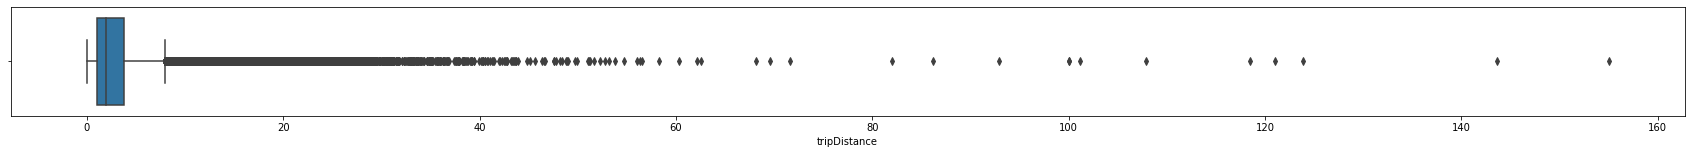

In [11]:
plt.figure(figsize=[30,2])
sns.boxplot(df['tripDistance'])

In [20]:
df['tripDistance'].loc[(df['tripDistance'] == 0)].count()

36467

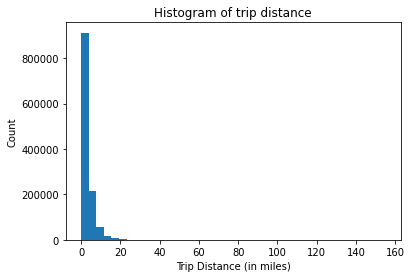

In [22]:
plt.hist(df['tripDistance'],bins = 40)
plt.title('Histogram of trip distance')
plt.xlabel('Trip Distance (in miles)')
plt.ylabel('Count')
plt.show()

In [23]:
df['tripDistance'].sort_values(ascending=False)

863514     155.00
763182     143.63
1094328    123.86
1089606    121.05
1172362    118.45
            ...  
1114959      0.00
46402        0.00
137862       0.00
137877       0.00
0            0.00
Name: tripDistance, Length: 1210811, dtype: float64

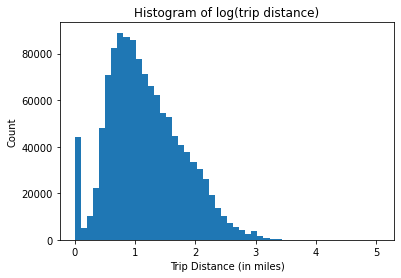

In [24]:
df['log_tripDistance'] = np.log(df['tripDistance']+1)
plt.hist(df['log_tripDistance'],bins=50)
plt.title('Histogram of log(trip distance)')
plt.xlabel('Trip Distance (in miles)')
plt.ylabel('Count')
plt.show()

### Passenger Count

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


1    958867
5    104758
2     93204
3     27774
6     14346
4     11356
0       441
7        30
8        18
9        17
Name: passengerCount, dtype: int64


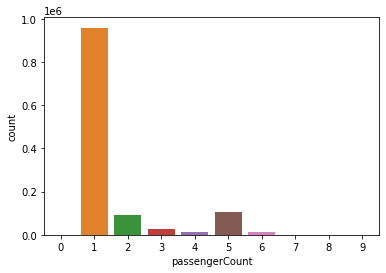

In [25]:
sns.countplot(df['passengerCount'])
print(df.passengerCount.value_counts())

### Pickup Time

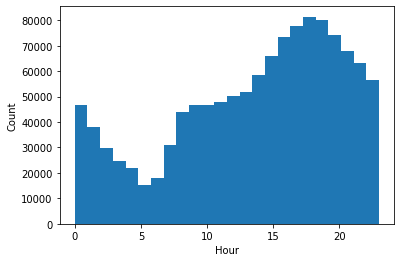

In [26]:
df['hour'] = pd.DatetimeIndex(df['lpepPickupDatetime']).hour
plt.hist(df['hour'],bins = 24)
plt.xlabel('Hour')
plt.ylabel('Count')
plt.show()

### Fare Amount

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


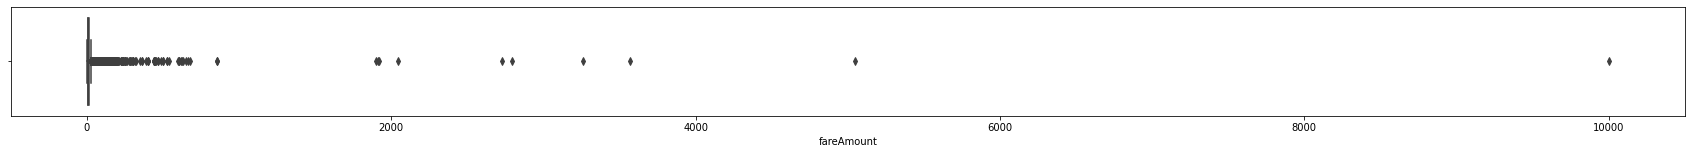

In [27]:
plt.figure(figsize=[30,2])
sns.boxplot(df['fareAmount'])

In [28]:
df['fareAmount'].sort_values(ascending=False)

952900     9999.99
99311      5048.50
23         3569.00
232        3259.50
977967     2794.50
            ...   
1064718       0.00
202727        0.00
614298        0.00
599731        0.00
28872        -0.50
Name: fareAmount, Length: 1210811, dtype: float64

In [29]:
print(df['fareAmount'].loc[(df['fareAmount'] < 0)].count())

1


### Tip Amount

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


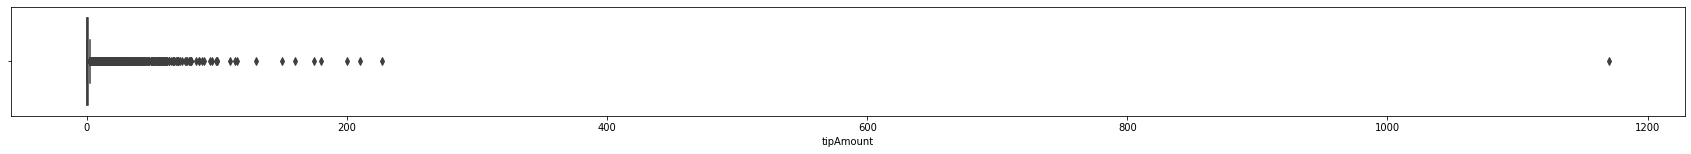

In [30]:
plt.figure(figsize=[30,2])
sns.boxplot(df['tipAmount'])

In [31]:
df['tipAmount'].sort_values(ascending=False)

562543     1170.00
277989      226.84
85812       210.08
847873      200.00
847902      180.00
            ...   
1031611       0.00
614610        0.00
1031612       0.00
1031613       0.00
0             0.00
Name: tipAmount, Length: 1210811, dtype: float64

### Longitude - Latitude

In [32]:
print(df['pickupLongitude'].loc[(df['pickupLongitude'] == 0)].count())
print(df['pickupLatitude'].loc[(df['pickupLatitude'] == 0)].count())
print(df['dropoffLongitude'].loc[(df['dropoffLongitude'] == 0)].count())
print(df['dropoffLatitude'].loc[(df['dropoffLatitude'] == 0)].count())

3636
3636
4008
4008


### Month

In [12]:
df['month'] = pd.DatetimeIndex(df['lpepPickupDatetime']).month
df.head()

,vendorID,lpepPickupDatetime,lpepDropoffDatetime,passengerCount,tripDistance,pickupLongitude,pickupLatitude,dropoffLongitude,dropoffLatitude,rateCodeID,storeAndFwdFlag,paymentType,fareAmount,extra,mtaTax,tipAmount,tollsAmount,totalAmount,trip_time,month
0,2,2013-08-01 08:14:37,2013-08-01 09:09:06,1,0.0,0.0,0.0,0.0,0.0,1,N,2,21.25,0.0,0.0,0.0,0.0,21.25,3269,8
1,2,2013-08-01 09:13:00,2013-08-01 11:38:00,2,0.0,0.0,0.0,0.0,0.0,1,N,2,74.50,0.0,0.5,0.0,0.0,75.00,8700,8
2,2,2013-08-01 09:48:00,2013-08-01 09:49:00,1,0.0,0.0,0.0,0.0,0.0,5,N,2,1.00,0.1,0.0,0.0,1.0,2.10,60,8
3,2,2013-08-01 10:38:35,2013-08-01 10:38:51,1,0.0,0.0,0.0,0.0,0.0,1,N,2,3.25,0.0,0.0,0.0,0.0,3.25,16,8
4,2,2013-08-01 11:51:45,2013-08-01 12:03:52,1,0.0,0.0,0.0,0.0,0.0,1,N,2,8.50,0.0,0.5,0.0,0.0,9.00,727,8


In [21]:
df['month'].value_counts()

12    602559
11    380974
10    170008
9      49647
8       7623
Name: month, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


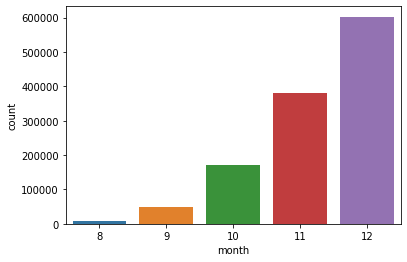

In [22]:
sns.countplot(df['month'])

--------------


## 2012

In [7]:
from google.colab import drive
drive.mount("/content/drive", force_remount=True)
arr = []
for filename in glob.iglob('/content/drive/MyDrive/green2/puYear=2012/**/*.parquet',recursive = True):
  arr.append(pd.read_parquet(filename))
df = pd.concat(arr, ignore_index=True)
df.head()

Mounted at /content/drive


,vendorID,lpepPickupDatetime,lpepDropoffDatetime,passengerCount,tripDistance,puLocationId,doLocationId,pickupLongitude,pickupLatitude,dropoffLongitude,dropoffLatitude,rateCodeID,storeAndFwdFlag,paymentType,fareAmount,extra,mtaTax,improvementSurcharge,tipAmount,tollsAmount,ehailFee,totalAmount,tripType
0,2,2012-09-13 19:36:14,2012-09-13 19:41:06,1,0.86,74,41,NaN,NaN,NaN,NaN,1,N,1,5.5,1.0,0.5,0.3,1.46,0.0,NaN,8.76,1
1,2,2012-09-13 19:49:46,2012-09-13 19:53:04,1,0.60,41,42,NaN,NaN,NaN,NaN,1,N,2,4.5,1.0,0.5,0.3,0.00,0.0,NaN,6.30,1
2,2,2012-09-13 21:17:52,2012-09-13 21:30:01,1,2.60,74,141,NaN,NaN,NaN,NaN,1,N,1,11.0,0.5,0.5,0.3,2.00,0.0,NaN,14.30,1


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   vendorID              3 non-null      int32         
 1   lpepPickupDatetime    3 non-null      datetime64[ns]
 2   lpepDropoffDatetime   3 non-null      datetime64[ns]
 3   passengerCount        3 non-null      int32         
 4   tripDistance          3 non-null      float64       
 5   puLocationId          3 non-null      object        
 6   doLocationId          3 non-null      object        
 7   pickupLongitude       0 non-null      float64       
 8   pickupLatitude        0 non-null      float64       
 9   dropoffLongitude      0 non-null      float64       
 10  dropoffLatitude       0 non-null      float64       
 11  rateCodeID            3 non-null      int32         
 12  storeAndFwdFlag       3 non-null      object        
 13  paymentType           3 

<font color = 'red'> This data is not sufficient to make further analysis. </font>

---------------------


## 2010


In [32]:
from google.colab import drive
drive.mount("/content/drive", force_remount=True)
arr = []
for filename in glob.iglob('/content/drive/MyDrive/green2/puYear=2010/**/*.parquet',recursive = True):
  arr.append(pd.read_parquet(filename))
df = pd.concat(arr, ignore_index=True)
df.head()

Mounted at /content/drive


,vendorID,lpepPickupDatetime,lpepDropoffDatetime,passengerCount,tripDistance,puLocationId,doLocationId,pickupLongitude,pickupLatitude,dropoffLongitude,dropoffLatitude,rateCodeID,storeAndFwdFlag,paymentType,fareAmount,extra,mtaTax,improvementSurcharge,tipAmount,tollsAmount,ehailFee,totalAmount,tripType
0,2,2010-09-23 18:45:35,2010-09-23 18:56:35,1,2.50,220,200,NaN,NaN,NaN,NaN,5,N,1,10.0,0.0,0.0,0.3,0.0,0.00,NaN,10.30,1
1,2,2010-09-23 00:10:50,2010-09-23 01:00:50,1,12.12,174,264,NaN,NaN,NaN,NaN,1,N,1,39.5,0.0,0.5,0.3,0.0,5.76,NaN,46.06,1
2,2,2010-09-23 01:28:02,2010-09-23 01:36:15,1,1.03,95,95,NaN,NaN,NaN,NaN,1,N,2,7.0,0.0,0.5,0.3,0.0,0.00,NaN,7.80,1
3,2,2010-09-23 02:05:12,2010-09-23 02:14:17,1,1.76,95,134,NaN,NaN,NaN,NaN,1,N,2,8.0,0.0,0.5,0.3,0.0,0.00,NaN,8.80,1
4,2,2010-09-23 23:11:56,2010-09-24 00:01:26,1,8.31,42,174,NaN,NaN,NaN,NaN,1,N,2,31.0,1.0,0.5,0.3,0.0,0.00,NaN,32.80,1


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 323 entries, 0 to 322
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   vendorID              323 non-null    int32         
 1   lpepPickupDatetime    323 non-null    datetime64[ns]
 2   lpepDropoffDatetime   323 non-null    datetime64[ns]
 3   passengerCount        323 non-null    int32         
 4   tripDistance          323 non-null    float64       
 5   puLocationId          323 non-null    object        
 6   doLocationId          323 non-null    object        
 7   pickupLongitude       0 non-null      float64       
 8   pickupLatitude        0 non-null      float64       
 9   dropoffLongitude      0 non-null      float64       
 10  dropoffLatitude       0 non-null      float64       
 11  rateCodeID            323 non-null    int32         
 12  storeAndFwdFlag       323 non-null    object        
 13  paymentType         

<font color = 'red'> This data is not sufficient to make further analysis. </font>

## 2009



In [2]:
from google.colab import drive
drive.mount("/content/drive", force_remount=True)
arr = []
for filename in glob.iglob('/content/drive/MyDrive/green2/puYear=2009/**/*.parquet',recursive = True):
  arr.append(pd.read_parquet(filename))
df = pd.concat(arr, ignore_index=True)
df.head()

Mounted at /content/drive


,vendorID,lpepPickupDatetime,lpepDropoffDatetime,passengerCount,tripDistance,puLocationId,doLocationId,pickupLongitude,pickupLatitude,dropoffLongitude,dropoffLatitude,rateCodeID,storeAndFwdFlag,paymentType,fareAmount,extra,mtaTax,improvementSurcharge,tipAmount,tollsAmount,ehailFee,totalAmount,tripType
0,2,2009-01-01 00:35:35,2009-01-01 00:39:12,1,0.62,95,95,NaN,NaN,NaN,NaN,1,N,2,4.5,0.5,0.5,0.3,0.0,0.0,NaN,5.8,1
1,2,2009-01-01 00:59:23,2009-01-01 01:10:02,1,2.52,95,135,NaN,NaN,NaN,NaN,1,N,1,11.0,0.5,0.5,0.3,1.7,0.0,NaN,14.0,1
2,2,2009-01-01 07:33:03,2009-01-01 07:50:49,1,2.93,181,33,NaN,NaN,NaN,NaN,1,N,2,13.5,0.0,0.5,0.3,0.0,0.0,NaN,14.3,1
3,2,2009-01-01 08:14:06,2009-01-01 08:35:42,1,2.61,181,33,NaN,NaN,NaN,NaN,1,N,2,14.5,0.0,0.5,0.3,0.0,0.0,NaN,15.3,1
4,2,2009-01-01 09:05:05,2009-01-01 09:10:54,1,0.67,181,181,NaN,NaN,NaN,NaN,1,N,2,5.5,0.0,0.5,0.3,0.0,0.0,NaN,6.3,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207 entries, 0 to 206
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   vendorID              207 non-null    int32         
 1   lpepPickupDatetime    207 non-null    datetime64[ns]
 2   lpepDropoffDatetime   207 non-null    datetime64[ns]
 3   passengerCount        207 non-null    int32         
 4   tripDistance          207 non-null    float64       
 5   puLocationId          207 non-null    object        
 6   doLocationId          207 non-null    object        
 7   pickupLongitude       0 non-null      float64       
 8   pickupLatitude        0 non-null      float64       
 9   dropoffLongitude      0 non-null      float64       
 10  dropoffLatitude       0 non-null      float64       
 11  rateCodeID            207 non-null    int32         
 12  storeAndFwdFlag       207 non-null    object        
 13  paymentType         

<font color = 'red'> This data is not sufficient to make further analysis. </font>

## 2008


In [30]:
from google.colab import drive
drive.mount("/content/drive", force_remount=True)
arr = []
for filename in glob.iglob('/content/drive/MyDrive/green2/puYear=2008/**/*.parquet',recursive = True):
  arr.append(pd.read_parquet(filename))
df = pd.concat(arr, ignore_index=True)
df.head()

Mounted at /content/drive


,vendorID,lpepPickupDatetime,lpepDropoffDatetime,passengerCount,tripDistance,puLocationId,doLocationId,pickupLongitude,pickupLatitude,dropoffLongitude,dropoffLatitude,rateCodeID,storeAndFwdFlag,paymentType,fareAmount,extra,mtaTax,improvementSurcharge,tipAmount,tollsAmount,ehailFee,totalAmount,tripType
0,2,2008-12-31 23:42:09,2008-12-31 23:47:51,1,0.74,166,166,NaN,NaN,NaN,NaN,1,N,2,5.5,0.0,0.5,0.3,0.00,0.0,NaN,6.30,1
1,2,2008-12-31 23:38:39,2008-12-31 23:49:14,1,1.69,41,24,NaN,NaN,NaN,NaN,1,N,2,9.0,0.0,0.5,0.3,0.00,0.0,NaN,9.80,1
2,2,2008-12-31 23:12:23,2008-12-31 23:14:28,1,0.48,166,166,NaN,NaN,NaN,NaN,1,N,2,4.0,0.0,0.5,0.3,0.00,0.0,NaN,4.80,1
3,2,2008-12-31 23:16:27,2008-12-31 23:27:59,1,2.38,166,143,NaN,NaN,NaN,NaN,1,N,1,10.5,0.0,0.5,0.3,2.26,0.0,NaN,13.56,1
4,2,2008-12-31 23:02:21,2008-12-31 23:11:16,1,1.30,74,236,NaN,NaN,NaN,NaN,1,N,2,7.5,0.0,0.5,0.3,0.00,0.0,NaN,8.30,1


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88 entries, 0 to 87
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   vendorID              88 non-null     int32         
 1   lpepPickupDatetime    88 non-null     datetime64[ns]
 2   lpepDropoffDatetime   88 non-null     datetime64[ns]
 3   passengerCount        88 non-null     int32         
 4   tripDistance          88 non-null     float64       
 5   puLocationId          88 non-null     object        
 6   doLocationId          88 non-null     object        
 7   pickupLongitude       0 non-null      float64       
 8   pickupLatitude        0 non-null      float64       
 9   dropoffLongitude      0 non-null      float64       
 10  dropoffLatitude       0 non-null      float64       
 11  rateCodeID            88 non-null     int32         
 12  storeAndFwdFlag       88 non-null     object        
 13  paymentType           

<font color = 'red'> This data is not sufficient to make further analysis. </font>

# Results 

##Completeness - Number of Missing Values

<table>
  <thead>
    <tr>
      <th>Year</th>
      <th>pu/doLocationId</th>
      <th>Longitude/Latitude*</th>
      <th>ehailFee</th>
      <th>improvementSurcharge </th>
      <th>tripType </th>
      <th>Other </th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td>2008</td>
      <td>❌ </td>
      <td>❌</td>
      <td>❌</td>
      <td>❌</td>
      <td>❌</td>
      <td>❌</td>
    </tr>
    <tr>
      <td>2009</td>
      <td>❌ </td>
      <td>❌ </td>
      <td>❌ </td>
      <td>❌ </td>
      <td>❌ </td>
      <td>❌ </td>
    </tr>
    <tr>
      <td>2010</td>
      <td>❌ </td>
      <td>❌ </td>
      <td>❌ </td>
      <td>❌ </td>
      <td>❌ </td>
      <td>❌ </td>
    </tr>
    <tr>
      <td>2012</td>
      <td>❌ </td>
      <td>❌ </td>
      <td>❌ </td>
      <td>❌ </td>
      <td>❌ </td>
      <td>❌ </td>
    </tr>
    <tr>
      <td>2013</td>
      <td>❌</td>
      <td>✅</td>
      <td>✅</td>
      <td>❌</td>
      <td>❌</td>
      <td>✅</td>
    </tr>
    <tr>
      <td>2014</td>
      <td>❌</td>
      <td>✅</td>
      <td>✅</td>
      <td>❌</td>
      <td>⊖</td>
      <td>✅</td>
    </tr>
    <tr>
      <td>2015</td>
      <td>❌</td>
      <td>✅</td>
      <td>✅</td>
      <td>✅</td>
      <td>⊖</td>
      <td>✅</td>
    </tr>
    <tr>
      <td>2016</td>
      <td>⊖</td>
      <td>⊖</td>
      <td>✅</td>
      <td>✅</td>
      <td>⊖</td>
      <td>✅</td>
    </tr>
    <tr>
      <td>2017</td>
      <td>✅</td>
      <td>❌</td>
      <td>✅</td>
      <td>✅</td>
      <td>⊖</td>
      <td>✅</td>
    </tr>
    <tr>
      <td>2018</td>
      <td>✅</td>
      <td>❌</td>
      <td>✅</td>
      <td>✅</td>
      <td>⊖</td>
      <td>✅</td>
    </tr>
    <tr>
      <td>2019</td>
      <td>✅</td>
      <td>❌</td>
      <td>✅</td>
      <td>✅</td>
      <td>✅</td>
      <td>✅</td>
    </tr>
    <tr>
      <td>2020</td>
      <td>❌ </td>
      <td>❌ </td>
      <td>❌ </td>
      <td>❌ </td>
      <td>❌ </td>
      <td>❌ </td>
    </tr>
    
  </tbody>
</table>

  <font size="1"> *Stands for pickupLongitude, pickupLatitude dropoffLongitude  dropoffLatitude columns </font> 

  <font size="1"> ✅ = Sufficient to analyze</font>  
  
  <font size="1"> ❌ = Not sufficient to analyze</font>

  <font size="1"> ⊖ = Some values are missing </font> 

 

To deal with NaN values we can,

  - Delete rows
  - Replace with mean/median/mode of the column
  - Predict missing values
  - Assign an unique category

##Accuracy: Closeness Between Reality and Results

There are some unrealistic variables in our dataset which can be called outliers:

  - Trip duration can not be 0 or unrealistically big values such as 10 hours,
  - Trip distance can not be 0 or unrealistically big values such as 100 mile,
  - Passenger count can not be 0 or bigger than 6 
  - Fare amount can not be an unrealistic value such as 4000 dolars,
  - Tip amount can not be an unrealistic value such as 400 dolars,
  - Longitude and latitude values can not be 0

These boundies can be changed according to our needs. Related graphs can be seen in Data Quality Section. 

To deal with outliers we can

  - Delete rows
  - Replace with mean/median/mode of the column
  - Use data transformation techniques


##Uniqueness: Number of Duplicates

Percentage of duplicate variables does not exceed even %0.00001 of total number of variables.

##Validity - Correctness of Data Format

All variable types are as they should be for all years



##Timeliness: Timeliness of Data

There are missing year in our dataset (2020-2012-2011-2010-2009-2008). We can not say the data meet the timeliness condition. 

##Consistency: Number of inconsistencies

Since our data was taken from one source, it is imposible to compare with another source to make any assumptions on consistency. 